<center><h2><span style="font-weight:bolder; color: red; font-size:120%",>Mobile Price Prediction Using Machine Learning Algorithms (Regression)</span></h2></center>

<div style="
  text-align:center;
  background: linear-gradient(135deg, #000000, #1a1a1a);
  border:2px solid #ff0800ff;
  border-radius:18px;
  padding:25px;
  box-shadow:0 0 25px rgba(255,215,0,0.3);
  transition:all 0.4s ease;
">
  <img src="image.png"
       width="680"
       style="
         border-radius:15px;
         box-shadow:0 0 35px rgba(255,215,0,0.4);
         transition: transform 0.4s ease, box-shadow 0.4s ease;
       "
       onmouseover="this.style.transform='scale(1.0)'; this.style.boxShadow='0 0 50px rgba(255,215,0,0.9)';"
       onmouseout="this.style.transform='scale(1.0)'; this.style.boxShadow='0 0 30px rgba(255,215,0,0.4)';"
  >
  <p style="
     color:#FFD700;
     font-size:20px;
     font-family:'Poppins', sans-serif;
     font-weight:600;
     margin-top:12px;
     letter-spacing:1px;
     text-shadow:0 0 10px rgba(255,215,0,0.8);
  ">
  </p>
</div>


<a id="read"></a>
# <p style="background-color:maroon; font-family:calibri; font-size:80%; color:white; text-align:center; border-radius:15px 50px; padding:10px">Step 1 | Import Libraries</p>

In [1]:
import math
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import colors
import matplotlib.pyplot as plt
import plotly.graph_objs as go
from plotly.subplots import make_subplots

import sklearn as sk
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder, LabelEncoder, PowerTransformer
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_squared_log_error
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import VotingRegressor
from sklearn.ensemble import StackingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from catboost import CatBoostRegressor
from sklearn.svm import SVR
import lightgbm as lgb
import xgboost as xgb

from sklearn.linear_model import ElasticNet
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.kernel_ridge import KernelRidge
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import HuberRegressor


import optuna

<a id="read"></a>
# <p style="background-color:maroon; font-family:calibri; font-size:80%; color:white; text-align:center; border-radius:15px 50px; padding:10px">Step 2 | Introduction</p>

____
<a id="num_univariate"></a>
# <b><span style='color:orangered'>Step 2.1 |</span><span style='color:maroon'> Introduction</span></b>  

<div
  style="border-radius:10px; border:#8B0000 solid; padding:15px; background-color:#FAF3F3; font-size:100%; text-align:left; color:#222;">
  <h3 align="left" style="color:#8B0000;">Introduction</h3>
  <p style="margin:6px 0 0; line-height:1.6;"> This project focuses on
    <strong>predicting the price of mobile phones</strong> using various <strong>Machine Learning algorithms</strong>.
    The dataset used in this project contains multiple features of different smartphones such as <em>RAM</em>,
    <em>Battery Capacity</em>, <em>Processor Type</em>, <em>Screen Size</em>, and other hardware specifications, along
    with their respective <strong>target prices</strong>. The primary goal of this project is to build a strong
    <strong>regression model</strong> that can accurately predict the <strong>mobile price</strong> based on the given
    features. By analyzing the relationship between these technical attributes and the price, this project aims to help
    users and manufacturers understand how different specifications affect the overall market price of a smartphone.
  </p>
</div>

____
<a id="num_univariate"></a>
# <b><span style='color:orangered'>Step 2.2 |</span><span style='color:maroon'> About the dataset and its features</span></b>  

<div
    style="border-radius:10px; border:#8B0000 solid; padding:10px; background-color:#FAF3F3; font-size:100%; text-align:left; color:#222;">
    Used dataset: <a href="https://www.kaggle.com/datasets/abdurrahman22224/smartphone-new-data" target="_blank">Click here for the Mobile Price Prediction dataset (Kaggle)</a>
</div>

<!DOCTYPE html>
<html lang="en">
<head>
  <meta charset="UTF-8">
  <meta name="viewport" content="width=device-width, initial-scale=1.0">
  <title>Smartphone Dataset Attributes</title>
  <style>
    /* CSS Custom Properties for theming */
    :root {
      --bg-color: #ffffff;
      --container-bg-color: #FAF3F3;
      --text-color: #222222;
      --primary-color: #8B0000;
      --container-border-color: #8B0000;
      --table-border-color: #e0c5c5;
      --header-bg-color: #F5D7D7;
      --row-hover-bg-color: #EFEFEF;
      --shadow-color: rgba(0, 0, 0, 0.05);
    }

    @media (prefers-color-scheme: dark) {
      :root {
        --bg-color: #121212;
        --container-bg-color: #2a2a2a;
        --text-color: #e0e0e0;
        --primary-color: #ff8a80;
        --container-border-color: #ff8a80;
        --table-border-color: #444444;
        --header-bg-color: #333333;
        --row-hover-bg-color: #3a3a3a;
        --shadow-color: rgba(0, 0, 0, 0.2);
      }
    }

    * {
      box-sizing: border-box;
    }

    body {
      font-family: -apple-system, BlinkMacSystemFont, "Segoe UI", Roboto, Helvetica, Arial, sans-serif;
      background-color: var(--bg-color);
      color: var(--text-color);
      margin: 0;
      padding: 1rem;
      line-height: 1.6;
      transition: background-color 0.3s, color 0.3s;
    }

    .container {
      border-radius: 12px;
      border: 2px solid var(--container-border-color);
      padding: 1.5rem;
      background-color: var(--container-bg-color);
      max-width: 1200px;
      margin: 2rem auto;
      box-shadow: 0 4px 12px var(--shadow-color);
    }

    h3 {
      text-align: center;
      color: var(--primary-color);
      margin-top: 0;
      font-size: 1.75rem;
    }

    .table-wrapper {
      overflow-x: auto; /* Enables horizontal scrolling on small screens */
    }

    table {
      width: 100%;
      border-collapse: collapse;
      font-size: 1rem;
      text-align: left;
    }

    th, td {
      padding: 12px 15px;
      border-bottom: 1px solid var(--table-border-color);
      white-space: nowrap; /* Prevents content from wrapping */
    }

    td:nth-child(3) {
      white-space: normal; /* Allow description to wrap */
    }

    thead {
      background-color: var(--header-bg-color);
    }

    th {
      font-weight: 600;
      border-bottom: 2px solid var(--primary-color);
    }

    tbody tr {
      transition: background-color 0.2s;
    }

    tbody tr:hover {
      background-color: var(--row-hover-bg-color);
    }

  </style>
</head>
<body>
  <div class="container">
    <h3>Smartphone Dataset Attributes</h3>
    <div class="table-wrapper">
      <table>
        <thead>
          <tr>
            <th>No.</th>
            <th>Attribute</th>
            <th>Feature Description</th>
            <th>Type</th>
          </tr>
        </thead>
        <tbody>
          <tr>
            <td>1</td>
            <td>brand_name</td>
            <td>Brand name of the smartphone</td>
            <td>Categorical</td>
          </tr>
          <tr>
            <td>2</td>
            <td>model</td>
            <td>Model name of the smartphone</td>
            <td>Categorical</td>
          </tr>
          <tr>
            <td>3</td>
            <td>rating</td>
            <td>Average user rating (out of 5)</td>
            <td>Numeric</td>
          </tr>
          <tr>
            <td>4</td>
            <td>has_5g</td>
            <td>Indicates if 5G connectivity is supported (1=True, 0=False)</td>
            <td>Boolean</td>
          </tr>
          <tr>
            <td>5</td>
            <td>has_nfc</td>
            <td>Indicates if NFC is supported (1=True, 0=False)</td>
            <td>Boolean</td>
          </tr>
          <tr>
            <td>6</td>
            <td>has_ir_blaster</td>
            <td>Indicates if IR Blaster is available</td>
            <td>Boolean</td>
          </tr>
          <tr>
            <td>7</td>
            <td>processor_brand</td>
            <td>Brand of processor (e.g., Qualcomm, MediaTek, Exynos)</td>
            <td>Categorical</td>
          </tr>
          <tr>
            <td>8</td>
            <td>num_cores</td>
            <td>Number of processor cores</td>
            <td>Numeric</td>
          </tr>
          <tr>
            <td>9</td>
            <td>processor_speed</td>
            <td>Processor clock speed (in GHz)</td>
            <td>Numeric</td>
          </tr>
          <tr>
            <td>10</td>
            <td>battery_capacity</td>
            <td>Total battery capacity (in mAh)</td>
            <td>Numeric</td>
          </tr>
          <tr>
            <td>11</td>
            <td>fast_charging</td>
            <td>Fast charging power (in Watts)</td>
            <td>Numeric</td>
          </tr>
          <tr>
            <td>12</td>
            <td>ram_capacity</td>
            <td>RAM size (in GB)</td>
            <td>Numeric</td>
          </tr>
          <tr>
            <td>13</td>
            <td>internal_memory</td>
            <td>Internal storage capacity (in GB)</td>
            <td>Numeric</td>
          </tr>
          <tr>
            <td>14</td>
            <td>screen_size</td>
            <td>Screen size (in inches)</td>
            <td>Numeric</td>
          </tr>
          <tr>
            <td>15</td>
            <td>refresh_rate</td>
            <td>Display refresh rate (in Hz)</td>
            <td>Numeric</td>
          </tr>
          <tr>
            <td>16</td>
            <td>resolution</td>
            <td>Display resolution (e.g., 2400×1080)</td>
            <td>Categorical</td>
          </tr>
          <tr>
            <td>17</td>
            <td>num_rear_cameras</td>
            <td>Number of rear cameras</td>
            <td>Numeric</td>
          </tr>
          <tr>
            <td>18</td>
            <td>num_front_cameras</td>
            <td>Number of front cameras</td>
            <td>Numeric</td>
          </tr>
          <tr>
            <td>19</td>
            <td>os</td>
            <td>Operating system (Android / iOS)</td>
            <td>Categorical</td>
          </tr>
          <tr>
            <td>20</td>
            <td>primary_camera_rear</td>
            <td>Main rear camera resolution (in Megapixels)</td>
            <td>Numeric</td>
          </tr>
          <tr>
            <td>21</td>
            <td>primary_camera_front</td>
            <td>Main front camera resolution (in Megapixels)</td>
            <td>Numeric</td>
          </tr>
          <tr>
            <td>22</td>
            <td>extended_memory_available</td>
            <td>Indicates if expandable memory slot is available</td>
            <td>Boolean</td>
          </tr>
          <tr>
            <td>23</td>
            <td>extended_upto</td>
            <td>Maximum expandable storage supported (in GB/TB)</td>
            <td>Numeric</td>
          </tr>
          <tr>
            <td>24</td>
            <td>price</td>
            <td>Price of the smartphone (Target Variable)</td>
            <td>Numeric</td>
          </tr>
        </tbody>
      </table>
    </div>
  </div>
</body>
</html>


<div
  style="border-radius:10px; border:#8B0000 solid; padding:15px; background-color:#FAF3F3; font-size:100%; text-align:left; color:#222;">
  <h3 align="left" style="color:#8B0000;">Dataset Information</h3>
  <ul style="list-style-type:none; padding-left:0; line-height:1.6;">
    <li>
      <strong>This dataset contains 987 rows, with details about 25 features.</strong>
    </li>
    <li>
      <strong>There are some empty or NaN and duplicates values in this dataset.</strong>
    </li>
  </ul>
</div>

<a id="read"></a>
# <p style="background-color:maroon; font-family:calibri; font-size:80%; color:white; text-align:center; border-radius:15px 50px; padding:10px">Step 3 | Data Collection</p>

____
<a id="num_univariate"></a>
# <b><span style='color:orangered'>Step 3.1 |</span><span style='color:maroon'> Load DataSet</span></b>  

In [2]:
# Load the dataset from current directory
df = pd.read_csv("smartphone.csv")
df.head(3) # Display the first 3 rows of the dataframe

brand_name                      model  rating  has_5g  has_nfc  \
0    oneplus              OnePlus 11 5G    89.0    True     True   
1    oneplus  OnePlus Nord CE 2 Lite 5G    81.0    True    False   
2    samsung      Samsung Galaxy A14 5G    75.0    True    False   

   has_ir_blaster processor_brand  num_cores  processor_speed  \
0           False      snapdragon        8.0              3.2   
1           False      snapdragon        8.0              2.2   
2           False          exynos        8.0              2.4   

   battery_capacity  ...  refresh_rate    resolution  num_rear_cameras  \
0            5000.0  ...           120  1440 x 3216                  3   
1            5000.0  ...           120  1080 x 2412                  3   
2            5000.0  ...            90  1080 x 2408                  3   

   num_front_cameras       os  primary_camera_rear primary_camera_front  \
0                1.0  android                 50.0                 16.0   
1                1.0  android                 64.0                 16.0   
2                1.0  android                 50.0                 13.0   

   extended_memory_available  extended_upto    price  
0                          0            NaN  54999.0  
1                          1         1024.0  19989.0  
2                          1         1024.0  16499.0  

[3 rows x 25 columns]

<a id="read"></a>
# <p style="background-color:maroon; font-family:calibri; font-size:80%; color:white; text-align:center; border-radius:15px 50px; padding:10px">Step 4 | Data Preprocessing</p>

In [3]:
df.head(3) # Display the last 3 rows of the dataframe

brand_name                      model  rating  has_5g  has_nfc  \
0    oneplus              OnePlus 11 5G    89.0    True     True   
1    oneplus  OnePlus Nord CE 2 Lite 5G    81.0    True    False   
2    samsung      Samsung Galaxy A14 5G    75.0    True    False   

   has_ir_blaster processor_brand  num_cores  processor_speed  \
0           False      snapdragon        8.0              3.2   
1           False      snapdragon        8.0              2.2   
2           False          exynos        8.0              2.4   

   battery_capacity  ...  refresh_rate    resolution  num_rear_cameras  \
0            5000.0  ...           120  1440 x 3216                  3   
1            5000.0  ...           120  1080 x 2412                  3   
2            5000.0  ...            90  1080 x 2408                  3   

   num_front_cameras       os  primary_camera_rear primary_camera_front  \
0                1.0  android                 50.0                 16.0   
1                1.0  android                 64.0                 16.0   
2                1.0  android                 50.0                 13.0   

   extended_memory_available  extended_upto    price  
0                          0            NaN  54999.0  
1                          1         1024.0  19989.0  
2                          1         1024.0  16499.0  

[3 rows x 25 columns]

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 987 entries, 0 to 986
Data columns (total 25 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   brand_name                 987 non-null    object 
 1   model                      987 non-null    object 
 2   rating                     885 non-null    float64
 3   has_5g                     987 non-null    bool   
 4   has_nfc                    987 non-null    bool   
 5   has_ir_blaster             987 non-null    bool   
 6   processor_brand            967 non-null    object 
 7   num_cores                  981 non-null    float64
 8   processor_speed            945 non-null    float64
 9   battery_capacity           975 non-null    float64
 10  fast_charging_available    775 non-null    float64
 11  fast_charging              775 non-null    float64
 12  ram_capacity               986 non-null    float64
 13  internal_memory            987 non-null    int64  

In [5]:
df.describe()

rating   num_cores  processor_speed  battery_capacity  \
count  885.000000  981.000000       945.000000        975.000000   
mean    78.273446    7.771662         2.427778       4815.648205   
std      7.386228    0.835960         0.464432       1007.961110   
min     60.000000    4.000000         1.200000       1821.000000   
25%     74.000000    8.000000         2.050000       4500.000000   
50%     80.000000    8.000000         2.300000       5000.000000   
75%     84.000000    8.000000         2.840000       5000.000000   
max     89.000000    8.000000         3.220000      22000.000000   

       fast_charging_available  fast_charging  ram_capacity  internal_memory  \
count               775.000000     775.000000    986.000000       987.000000   
mean                 46.078710      46.078710      6.562880       141.138804   
std                  34.304387      34.304387      2.743262       106.910362   
min                  10.000000      10.000000      1.000000         8.000000   
25%                  18.000000      18.000000      4.000000        64.000000   
50%                  33.000000      33.000000      6.000000       128.000000   
75%                  66.000000      66.000000      8.000000       128.000000   
max                 240.000000     240.000000     18.000000      1024.000000   

       screen_size  refresh_rate  num_rear_cameras  num_front_cameras  \
count   987.000000    987.000000        987.000000         983.000000   
mean      6.537761     92.270517          2.815603           1.031536   
std       0.350156     28.962114          0.776453           0.174850   
min       3.540000     60.000000          1.000000           1.000000   
25%       6.500000     60.000000          2.000000           1.000000   
50%       6.580000     90.000000          3.000000           1.000000   
75%       6.670000    120.000000          3.000000           1.000000   
max       8.030000    240.000000          4.000000           2.000000   

       primary_camera_rear  primary_camera_front  extended_memory_available  \
count           987.000000            982.000000                 987.000000   
mean             50.456839             16.597149                   0.629179   
std              33.255229             10.900773                   0.483269   
min               2.000000              0.300000                   0.000000   
25%              32.000000              8.000000                   0.000000   
50%              50.000000             16.000000                   1.000000   
75%              64.000000             16.000000                   1.000000   
max             200.000000             60.000000                   1.000000   

       extended_upto          price  
count     503.000000     986.000000  
mean      736.254473   32613.674442  
std       366.874338   39638.505052  
min        32.000000       0.000000  
25%       512.000000   12999.000000  
50%      1024.000000   19999.000000  
75%      1024.000000   35496.500000  
max      2048.000000  650000.000000

In [6]:
df.duplicated().sum()

np.int64(3)

____
<a id="num_univariate"></a>
# <b><span style='color:orangered'>Step 4.1 |</span><span style='color:maroon'> Data Cleaning</span></b>  

### <a id="num_univariate_1"></a>
#### <b><span style='color:darkorange'>Step 4.1.1 |</span><span style='color:teal'> Handle Missing Values</span></b>

In [7]:
df.isnull().sum()

brand_name                     0
model                          0
rating                       102
has_5g                         0
has_nfc                        0
has_ir_blaster                 0
processor_brand               20
num_cores                      6
processor_speed               42
battery_capacity              12
fast_charging_available      212
fast_charging                212
ram_capacity                   1
internal_memory                0
screen_size                    0
refresh_rate                   0
resolution                     0
num_rear_cameras               0
num_front_cameras              4
os                            14
primary_camera_rear            0
primary_camera_front           5
extended_memory_available      0
extended_upto                484
price                          1
dtype: int64

In [8]:
df[['rating', 'fast_charging', 'extended_upto']] = df[['rating', 'fast_charging', 'extended_upto']].fillna(df[['rating', 'fast_charging', 'extended_upto']].mean())

In [9]:
df.isnull().sum()

brand_name                     0
model                          0
rating                         0
has_5g                         0
has_nfc                        0
has_ir_blaster                 0
processor_brand               20
num_cores                      6
processor_speed               42
battery_capacity              12
fast_charging_available      212
fast_charging                  0
ram_capacity                   1
internal_memory                0
screen_size                    0
refresh_rate                   0
resolution                     0
num_rear_cameras               0
num_front_cameras              4
os                            14
primary_camera_rear            0
primary_camera_front           5
extended_memory_available      0
extended_upto                  0
price                          1
dtype: int64

In [10]:
df.dropna(inplace=True)
df.isnull().sum()

brand_name                   0
model                        0
rating                       0
has_5g                       0
has_nfc                      0
has_ir_blaster               0
processor_brand              0
num_cores                    0
processor_speed              0
battery_capacity             0
fast_charging_available      0
fast_charging                0
ram_capacity                 0
internal_memory              0
screen_size                  0
refresh_rate                 0
resolution                   0
num_rear_cameras             0
num_front_cameras            0
os                           0
primary_camera_rear          0
primary_camera_front         0
extended_memory_available    0
extended_upto                0
price                        0
dtype: int64

### <a id="num_univariate_2"></a>
#### <b><span style='color:darkorange'>Step 4.1.2 |</span><span style='color:teal'> Remove Duplicates</span></b>


In [11]:
df.duplicated().sum()

np.int64(2)

In [12]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

np.int64(0)

### <a id="num_univariate_3"></a>
#### <b><span style='color:darkorange'>Step 4.1.3 |</span><span style='color:teal'> Data Type Conversion</span></b>



In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 736 entries, 0 to 986
Data columns (total 25 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   brand_name                 736 non-null    object 
 1   model                      736 non-null    object 
 2   rating                     736 non-null    float64
 3   has_5g                     736 non-null    bool   
 4   has_nfc                    736 non-null    bool   
 5   has_ir_blaster             736 non-null    bool   
 6   processor_brand            736 non-null    object 
 7   num_cores                  736 non-null    float64
 8   processor_speed            736 non-null    float64
 9   battery_capacity           736 non-null    float64
 10  fast_charging_available    736 non-null    float64
 11  fast_charging              736 non-null    float64
 12  ram_capacity               736 non-null    float64
 13  internal_memory            736 non-null    int64  
 14 

In [14]:
# Check memory before optimization
print("Memory usage before optimization:")
print(df.info(memory_usage='deep')) # memory usage: 354.8 KB


# Convert selected numeric columns to float16
cols1 = [
    'num_cores', 'processor_speed', 'fast_charging', 
    'screen_size', 'refresh_rate', 'num_rear_cameras'
]

# Convert data types
df[cols1] = df[cols1].astype('float16')

# Convert selected numeric columns to float16
cols2 = [
    'rating', 'num_cores', 'battery_capacity', 
    'ram_capacity', 'internal_memory', 'extended_upto',
    'num_rear_cameras', 'num_front_cameras', 'primary_camera_rear', 'primary_camera_front'
]

# Convert data types
df[cols2] = df[cols2].astype('int16')

# Check memory after optimization
print("\nMemory usage after optimization:")
print(df.info(memory_usage='deep')) # memory usage: 294.4 KB

Memory usage before optimization:
<class 'pandas.core.frame.DataFrame'>
Index: 736 entries, 0 to 986
Data columns (total 25 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   brand_name                 736 non-null    object 
 1   model                      736 non-null    object 
 2   rating                     736 non-null    float64
 3   has_5g                     736 non-null    bool   
 4   has_nfc                    736 non-null    bool   
 5   has_ir_blaster             736 non-null    bool   
 6   processor_brand            736 non-null    object 
 7   num_cores                  736 non-null    float64
 8   processor_speed            736 non-null    float64
 9   battery_capacity           736 non-null    float64
 10  fast_charging_available    736 non-null    float64
 11  fast_charging              736 non-null    float64
 12  ram_capacity               736 non-null    float64
 13  internal_memory      

____
<a id="num_univariate"></a>
# <b><span style='color:orangered'>Step 4.2 |</span><span style='color:maroon'> Outliers Detection</span></b>  

In [15]:
# Select only numeric columns
numeric_cols = df.select_dtypes(include=['float16' ,'float64','int16' ,'int64']).columns

outliers_dict = {}

# Detect outliers using IQR
for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    
    # Get outlier rows
    outlier_rows = df[(df[col] < lower) | (df[col] > upper)]
    
    if not outlier_rows.empty:
        outliers_dict[col] = outlier_rows

# Display summary
for col, rows in outliers_dict.items():
    print(f"⚠️ Outliers in '{col}': {len(rows)} rows")


⚠️ Outliers in 'rating': 25 rows
⚠️ Outliers in 'num_cores': 10 rows
⚠️ Outliers in 'battery_capacity': 66 rows
⚠️ Outliers in 'fast_charging_available': 13 rows
⚠️ Outliers in 'fast_charging': 13 rows
⚠️ Outliers in 'ram_capacity': 92 rows
⚠️ Outliers in 'internal_memory': 292 rows
⚠️ Outliers in 'screen_size': 31 rows
⚠️ Outliers in 'num_rear_cameras': 269 rows
⚠️ Outliers in 'num_front_cameras': 26 rows
⚠️ Outliers in 'primary_camera_rear': 171 rows
⚠️ Outliers in 'primary_camera_front': 37 rows
⚠️ Outliers in 'extended_upto': 65 rows
⚠️ Outliers in 'price': 60 rows


### <a id="num_univariate_4"></a>
#### <b><span style='color:darkorange'>Step 4.2.1 |</span><span style='color:teal'> Outlier Detection for 'rating'</span></b>

In [16]:
# Calculate IQR for 'rating' column
q125 = df['rating'].quantile(0.25)
q375 = df['rating'].quantile(0.75)
print(f"Q1 (25th percentile): {q125}")
print(f"Q3 (75th percentile): {q375}")
iqr = q375 - q125
print(f"IQR (Interquartile Range): {iqr}")

# Identify outlier rows in 'rating' column
outlier_rows = df[(df['rating'] < (q125 - 1.5 * iqr)) | (df['rating'] > (q375 + 1.5 * iqr))]
outlier_rows


Q1 (25th percentile): 77.0
Q3 (75th percentile): 84.0
IQR (Interquartile Range): 7.0


C:\Users\miraj\AppData\Roaming\Python\Python313\site-packages\pandas\io\formats\format.py:1458: RuntimeWarning: overflow encountered in cast
  has_large_values = (abs_vals > 1e6).any()
C:\Users\miraj\AppData\Roaming\Python\Python313\site-packages\pandas\io\formats\format.py:1458: RuntimeWarning: overflow encountered in cast
  has_large_values = (abs_vals > 1e6).any()


brand_name                                    model  rating  has_5g  \
16        vivo                                 Vivo Y16      65   False   
52         jio                          Jio JioPhone 5G      64    True   
181      tecno                      Tecno Spark Go 2023      62   False   
188      leeco                             LeEco S1 Pro      65   False   
198    samsung                       Samsung Galaxy M04      66   False   
236       vivo                Vivo Y16 (3GB RAM + 64GB)      66   False   
298       vivo                                Vivo Y01A      60   False   
349     xiaomi                    Xiaomi Redmi 9i Sport      66   False   
379       vivo                                Vivo Y02s      61   False   
409    samsung                       Samsung Galaxy A03      66   False   
463    infinix                      Infinix Hot 12 Play      66   False   
474   motorola                        Motorola Moto E13      65   False   
501     xiaomi                     Xiaomi Redmi A1 Plus      60   False   
528      nokia                                Nokia C31      62   False   
549   motorola                       Motorola Moto E32s      65   False   
620     realme             Realme C30s (4GB RAM + 64GB)      62   False   
638      apple                     Apple iPhone SE 2020      63   False   
639       letv                         Letv Y1 Pro Plus      60   False   
646       itel                            itel Vision 3      61   False   
732       poco                Poco C50 (3GB RAM + 32GB)      61   False   
795     realme                   Realme Narzo 50i Prime      61   False   
836     xiaomi          Xiaomi Redmi 8 (4GB RAM + 64GB)      66   False   
898     xiaomi    Xiaomi Redmi A1 Plus (3GB RAM + 32GB)      61   False   
904        tcl                                TCL Ion X      60   False   
970     realme  Realme Narzo 50i Prime (4GB RAM + 64GB)      64   False   

     has_nfc  has_ir_blaster processor_brand  num_cores  processor_speed  \
16     False           False           helio          8         2.300781   
52     False           False      snapdragon          8         2.199219   
181    False           False           helio          4         2.000000   
188    False           False           tiger          4         1.799805   
198    False           False           helio          8         2.300781   
236    False           False           helio          8         2.300781   
298    False           False           helio          8         2.300781   
349    False           False           helio          8         2.000000   
379    False           False           helio          8         2.300781   
409    False           False          unisoc          8         1.599609   
463    False           False           tiger          8         1.820312   
474    False           False           tiger          8         2.000000   
501    False           False           helio          4         2.000000   
528    False           False          unisoc          8         1.599609   
549    False           False           helio          8         1.799805   
620    False           False          unisoc          8         1.599609   
638     True           False          bionic          6         2.650391   
639    False           False           tiger          4         1.799805   
646    False           False          unisoc          8         1.599609   
732    False           False           helio          4         2.000000   
795    False           False           tiger          8         1.820312   
836    False            True      snapdragon          8         2.000000   
898    False           False           helio          4         2.000000   
904    False           False           helio          8         2.000000   
970    False           False           tiger          8         1.820312   

     battery_capacity  ...  refresh_rate   resolution  num_rear_cameras  \
1

<Axes: xlabel='rating'>

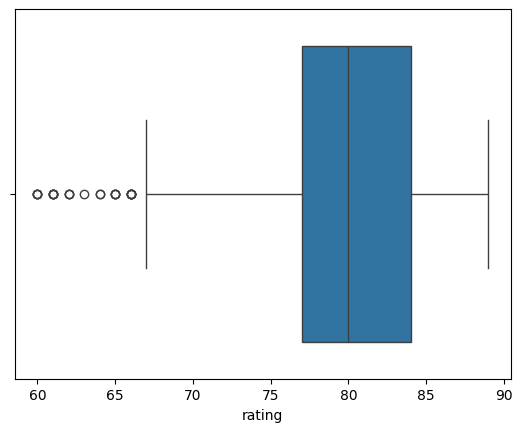

In [17]:
sns.boxplot(x=df['rating'])

In [18]:
# Remove outliers from 'rating' column

# Identify non-outlier rows
nonoutlier_rows = df[(df['rating'] >= (q125 - 1.5 * iqr)) & (df['rating'] <= (q375 + 1.5 * iqr))]

# Display non-outlier rows max() and min()
print('Max rating before outlier removal: ' ,nonoutlier_rows['rating'].max())
print('Min rating before outlier removal: ' ,nonoutlier_rows['rating'].min())

# Cap (Capping: Replace extreme (outlier) values with a fixed limit.) the outliers in 'rating' column with '67.0'
df['rating'] =df['rating'].where( df['rating'] > 67.0, 67.0)

# Display non-outlier rows
print('\nAfter outliers removal: ' ,df[df['rating']< 67.0]) # No outliers should be present now

Max rating before outlier removal:  89
Min rating before outlier removal:  67

After outliers removal:  Empty DataFrame
Columns: [brand_name, model, rating, has_5g, has_nfc, has_ir_blaster, processor_brand, num_cores, processor_speed, battery_capacity, fast_charging_available, fast_charging, ram_capacity, internal_memory, screen_size, refresh_rate, resolution, num_rear_cameras, num_front_cameras, os, primary_camera_rear, primary_camera_front, extended_memory_available, extended_upto, price]
Index: []

[0 rows x 25 columns]


### <a id="num_univariate_4"></a>
#### <b><span style='color:darkorange'>Step 4.2.2 |</span><span style='color:teal'> Outlier Detection for 'num_cores'</span></b>

In [19]:
# Calculate IQR for 'num_cores' column
q125 = df['num_cores'].quantile(0.25)
q375 = df['num_cores'].quantile(0.75)
print(f"Q1 (25th percentile): {q125}")
print(f"Q3 (75th percentile): {q375}")
iqr = q375 - q125
print(f"IQR (Interquartile Range): {iqr}")

# Identify outlier rows in 'num_cores' column
outlier_rows = df[(df['num_cores'] < (q125 - 1.5 * iqr)) | (df['num_cores'] > (q375 + 1.5 * iqr))]

# Non outliers rows for 'num_cores' column
nonoutlier_rows = df[(df['num_cores'] >= (q125 - 1.5 * iqr)) & (df['num_cores'] <= (q375 + 1.5 * iqr))]

# Display non-outlier rows max() and min()
print('Maximum cores: ' ,nonoutlier_rows['num_cores'].max())
print('Minimum cores: ' ,nonoutlier_rows['num_cores'].min())


Q1 (25th percentile): 8.0
Q3 (75th percentile): 8.0
IQR (Interquartile Range): 0.0
Maximum cores:  8
Minimum cores:  8


### <a id="num_univariate_4"></a>
#### <b><span style='color:darkorange'>Step 4.2.3 |</span><span style='color:teal'> Outlier Detection for 'ram_capacity'</span></b>

In [20]:
# Find outliers in 'ram_capacity' column

# Calculate IQR for 'ram_capacity' column
q125 = df['ram_capacity'].quantile(0.25)
q375 = df['ram_capacity'].quantile(0.75)
print(f"Q1 (25th percentile): {q125}")
print(f"Q3 (75th percentile): {q375}")
iqr = q375 - q125
print(f"IQR (Interquartile Range): {iqr}")

# Identify outlier rows in 'ram_capacity' column
outlier_rows = df[(df['ram_capacity'] < (q125 - 1.5 * iqr)) | (df['ram_capacity'] > (q375 + 1.5 * iqr))]

# Non outliers rows for 'ram_capacity' column
nonoutlier_rows = df[(df['ram_capacity'] >= (q125 - 1.5 * iqr)) & (df['ram_capacity'] <= (q375 + 1.5 * iqr))]

# Display non-outlier rows max() and min()
print('Maximum RAM Capacity: ' ,nonoutlier_rows['ram_capacity'].max())
print('Minimum RAM Capacity: ' ,nonoutlier_rows['ram_capacity'].min())

# Display outlier rows
outlier_rows


Q1 (25th percentile): 6.0
Q3 (75th percentile): 8.0
IQR (Interquartile Range): 2.0
Maximum RAM Capacity:  8
Minimum RAM Capacity:  3


C:\Users\miraj\AppData\Roaming\Python\Python313\site-packages\pandas\io\formats\format.py:1458: RuntimeWarning: overflow encountered in cast
  has_large_values = (abs_vals > 1e6).any()
C:\Users\miraj\AppData\Roaming\Python\Python313\site-packages\pandas\io\formats\format.py:1458: RuntimeWarning: overflow encountered in cast
  has_large_values = (abs_vals > 1e6).any()


brand_name                                             model  rating  \
0      oneplus                                     OnePlus 11 5G      89   
17        oppo                              OPPO Reno 9 Pro Plus      86   
24        vivo                                      Vivo V26 Pro      87   
37     samsung                       Samsung Galaxy S22 Ultra 5G      78   
67      xiaomi  Xiaomi Redmi Note 12 Pro Plus (12GB RAM + 256GB)      87   
..         ...                                               ...     ...   
905    samsung          Samsung Galaxy Z Fold 4 (12GB RAM + 1TB)      78   
908    oneplus                                   OnePlus Ace Pro      86   
916       vivo                 Vivo X Fold 5G (12GB RAM + 512GB)      78   
967     xiaomi                                         Xiaomi 14      89   
974       vivo                                     Vivo X Fold 2      78   

     has_5g  has_nfc  has_ir_blaster processor_brand  num_cores  \
0      True     True           False      snapdragon          8   
17     True     True           False      snapdragon          8   
24     True     True           False       dimensity          8   
37     True     True           False      snapdragon          8   
67     True    False            True       dimensity          8   
..      ...      ...             ...             ...        ...   
905    True     True           False      snapdragon          8   
908    True     True           False      snapdragon          8   
916    True     True           False      snapdragon          8   
967    True     True            True      snapdragon          8   
974    True     True           False      snapdragon          8   

     processor_speed  battery_capacity  ...  refresh_rate    resolution  \
0           3.199219              5000  ...         120.0  1440 x 3216    
17          3.199219              4700  ...         120.0  1080 x 2412    
24          3.199219              4800  ...         120.0  1080 x 2400    
37          3.000000              5000  ...         120.0  1440 x 3080    
67          2.599609              4980  ...         120.0  1080 x 2400    
..               ...               ...  ...           ...           ...   
905         3.199219              4400  ...         120.0  1812 x 2176    
908         3.199219              4800  ...         120.0  1080 x 2412    
916         3.000000              4600  ...         120.0  1916 x 2160    
967         3.199219              5000  ...         120.0  1440 x 3200    
974         3.199219              4800  ...         120.0  1916 x 2160    

     num_rear_cameras  num_front_cameras       os  primary_camera_rear  \
0                   3                  1  android                   50   
17                  3                  1  android                   50   
24                  3                  1  android                   64   
37                  4                  1  android                  108   
67                  3                  1  android                  200   
..                ...                ...      ...                  ...   
905                 3                  2  android                   50   
908                 3                  1  android                   50   
916                 4                  1  android                   50   
967                 3                  1  android                   50   
974                 3                  1  android                   50   

    primary_camera_front  extended_memory_available  extended_upto     price  
0                     16                          0            736   54999.0  
17                    32                          0            736   45999.0  
24                    32                          0            736   42990.0  
37                    40                          0            736   91999.0  
67                    16                          0            736   32999.0  
..                   .

<Axes: xlabel='ram_capacity'>

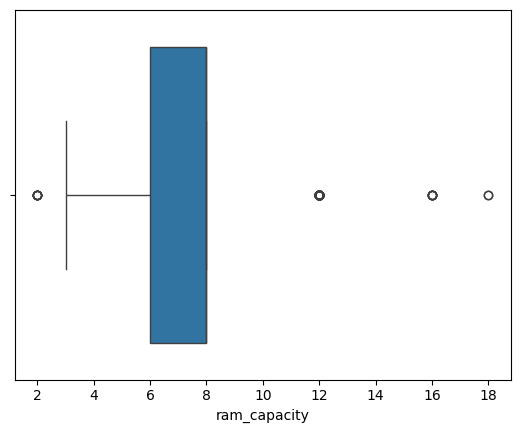

In [21]:
sns.boxplot(x=df['ram_capacity'])

### <a id="num_univariate_4"></a>
#### <b><span style='color:darkorange'>Step 4.2.4 |</span><span style='color:teal'> Outlier Detection for 'price'</span></b>

<Axes: xlabel='price'>

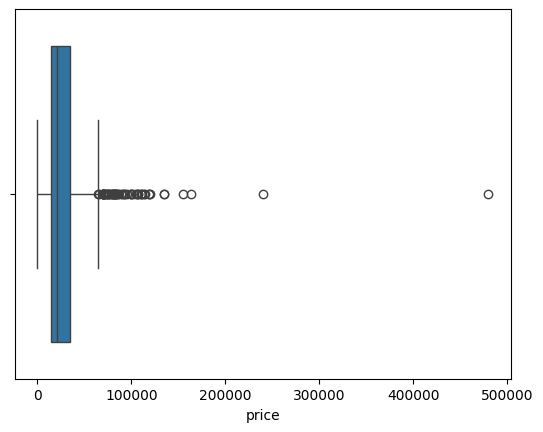

In [22]:
sns.boxplot(x=df['price'])

In [23]:
# Find outliers in 'price' column
    
# Calculate IQR for 'price' column
q125 = df['price'].quantile(0.25)
q375 = df['price'].quantile(0.75)
print(f"Q1 (25th percentile): {q125}")
print(f"Q3 (75th percentile): {q375}")
iqr = q375 - q125
print(f"IQR (Interquartile Range): {iqr}")

# Identify outlier rows in 'price' column
low_price = q125 - 1.5 * iqr
high_price = q375 + 1.5 * iqr
df = df[(df['price'] >= low_price) & (df['price'] <= high_price)]

Q1 (25th percentile): 14990.0
Q3 (75th percentile): 34959.25
IQR (Interquartile Range): 19969.25


In [24]:
# Check for rows where 'price' is 0
print('Rows where price is 0:' ,df[df['price'] == 0])

Rows where price is 0:     brand_name                           model  rating  has_5g  has_nfc  \
986       iqoo  iQOO Z6 Lite (6GB RAM + 128GB)      79    True    False   

     has_ir_blaster processor_brand  num_cores  processor_speed  \
986           False      snapdragon          8              2.0   

     battery_capacity  ...  refresh_rate    resolution  num_rear_cameras  \
986              5000  ...         120.0  1080 x 2408                  2   

     num_front_cameras       os  primary_camera_rear primary_camera_front  \
986                  1  android                   50                    8   

     extended_memory_available  extended_upto price  
986                          1           1024   0.0  

[1 rows x 25 columns]


C:\Users\miraj\AppData\Roaming\Python\Python313\site-packages\pandas\io\formats\format.py:1458: RuntimeWarning: overflow encountered in cast
  has_large_values = (abs_vals > 1e6).any()


In [25]:
# Remove rows where 'price' is 0 by plot
df = df[df['price'] != 0]

# After removing rows where 'price' is 0
print('Rows where price is 0:' ,df[df['price'] == 0])

Rows where price is 0: Empty DataFrame
Columns: [brand_name, model, rating, has_5g, has_nfc, has_ir_blaster, processor_brand, num_cores, processor_speed, battery_capacity, fast_charging_available, fast_charging, ram_capacity, internal_memory, screen_size, refresh_rate, resolution, num_rear_cameras, num_front_cameras, os, primary_camera_rear, primary_camera_front, extended_memory_available, extended_upto, price]
Index: []

[0 rows x 25 columns]


In [26]:
df

C:\Users\miraj\AppData\Roaming\Python\Python313\site-packages\pandas\io\formats\format.py:1458: RuntimeWarning: overflow encountered in cast
  has_large_values = (abs_vals > 1e6).any()
C:\Users\miraj\AppData\Roaming\Python\Python313\site-packages\pandas\io\formats\format.py:1458: RuntimeWarning: overflow encountered in cast
  has_large_values = (abs_vals > 1e6).any()


brand_name                                    model  rating  has_5g  \
0      oneplus                            OnePlus 11 5G      89    True   
1      oneplus                OnePlus Nord CE 2 Lite 5G      81    True   
2      samsung                    Samsung Galaxy A14 5G      75    True   
4       realme                       Realme 10 Pro Plus      82    True   
5      samsung  Samsung Galaxy F23 5G (6GB RAM + 128GB)      80    True   
..         ...                                      ...     ...     ...   
969     xiaomi                            Xiaomi Civi 3      86    True   
970     realme  Realme Narzo 50i Prime (4GB RAM + 64GB)      67   False   
975   motorola               Motorola Moto Edge S30 Pro      83    True   
976      honor                              Honor X8 5G      75    True   
977       poco          POCO X4 GT 5G (8GB RAM + 256GB)      85    True   

     has_nfc  has_ir_blaster processor_brand  num_cores  processor_speed  \
0       True           False      snapdragon          8         3.199219   
1      False           False      snapdragon          8         2.199219   
2      False           False          exynos          8         2.400391   
4      False           False       dimensity          8         2.599609   
5       True           False      snapdragon          8         2.199219   
..       ...             ...             ...        ...              ...   
969     True            True       dimensity          8         3.099609   
970    False           False           tiger          8         1.820312   
975    False           False      snapdragon          8         3.000000   
976    False           False      snapdragon          8         2.199219   
977     True            True       dimensity          8         2.849609   

     battery_capacity  ...  refresh_rate    resolution  num_rear_cameras  \
0                5000  ...         120.0  1440 x 3216                  3   
1                5000  ...         120.0  1080 x 2412                  3   
2                5000  ...          90.0  1080 x 2408                  3   
4                5000  ...         120.0  1080 x 2412                  3   
5                5000  ...         120.0  1080 x 2408                  3   
..                ...  ...           ...           ...               ...   
969              5000  ...         120.0  1080 x 2400                  3   
970              5000  ...          60.0   720 x 1600                  1   
975              5000  ...         120.0  1080 x 2460                  3   
976              5000  ...          60.0   720 x 1600                  3   
977              5080  ...         144.0  1080 x 2460                  3   

     num_front_cameras       os  primary_camera_rear primary_camera_front  \
0                    1  android                   50                   16   
1                    1  android                   64                   16   
2                    1  android                   50                   13   
4                    1  android                  108                   16   
5                    1  android                   50                    8   
..                 ...      ...                  ...                  ...   
969                  2  android                   64                   32   
970                  1  android                    8                    5   
975                  1  android                   64                   16   
976                  1  android                   48                    8   
977                  1  android                   64                   16   

     extended_memory_available  extended_upto    price  
0                            0            736  54999.0  
1                            1           1024  19989.0  
2                            1           1024  16499.0  
4                            0            736  24999.0  
5                            1           1024  16999.0  
..        

<a id="read"></a>
# <p style="background-color:maroon; font-family:calibri; font-size:80%; color:white; text-align:center; border-radius:15px 50px; padding:10px">Step 5 | Feature Engineering</p>

____
<a id="num_univariate"></a>
# <b><span style='color:orangered'>Step 5.1 |</span><span style='color:maroon'> Extract only model names from the 'model' column</span></b>  

In [27]:
df['model']

0                                OnePlus 11 5G
1                    OnePlus Nord CE 2 Lite 5G
2                        Samsung Galaxy A14 5G
4                           Realme 10 Pro Plus
5      Samsung Galaxy F23 5G (6GB RAM + 128GB)
                        ...                   
969                              Xiaomi Civi 3
970    Realme Narzo 50i Prime (4GB RAM + 64GB)
975                 Motorola Moto Edge S30 Pro
976                                Honor X8 5G
977            POCO X4 GT 5G (8GB RAM + 256GB)
Name: model, Length: 675, dtype: object

### <a id="num_univariate_4"></a>
#### <b><span style='color:darkorange'>Step 5.1.1 |</span><span style='color:teal'> Remove RAM and internal memory from 'model' column</span></b>

In [28]:
df[df['model'].str.contains('RAM')].sample(3)

C:\Users\miraj\AppData\Roaming\Python\Python313\site-packages\pandas\io\formats\format.py:1458: RuntimeWarning: overflow encountered in cast
  has_large_values = (abs_vals > 1e6).any()
C:\Users\miraj\AppData\Roaming\Python\Python313\site-packages\pandas\io\formats\format.py:1458: RuntimeWarning: overflow encountered in cast
  has_large_values = (abs_vals > 1e6).any()


brand_name                                        model  rating  has_5g  \
707    infinix           Infinix Note 11S (8GB RAM + 128GB)      79   False   
382       iqoo                 iQOO Z6 5G (8GB RAM + 128GB)      82    True   
921     xiaomi  Xiaomi 11i HyperCharge 5G (8GB RAM + 128GB)      86    True   

     has_nfc  has_ir_blaster processor_brand  num_cores  processor_speed  \
707    False           False           helio          8         2.050781   
382    False           False      snapdragon          8         2.199219   
921    False            True       dimensity          8         2.500000   

     battery_capacity  ...  refresh_rate    resolution  num_rear_cameras  \
707              5000  ...         120.0  1080 x 2460                  3   
382              5000  ...         120.0  1080 x 2408                  3   
921              4500  ...         120.0  2400 x 1080                  3   

     num_front_cameras       os  primary_camera_rear primary_camera_front  \
707                  1  android                   50                   16   
382                  1  android                   50                   16   
921                  1  android                  108                   16   

     extended_memory_available  extended_upto    price  
707                          1           2048  15999.0  
382                          1           1024  18498.0  
921                          1           1024  26999.0  

[3 rows x 25 columns]

In [29]:
df[df['model'].str.contains('RAM')]['model'].apply(lambda x : x.split('(')[0])

5          Samsung Galaxy F23 5G 
13                    Vivo T1 5G 
26     OnePlus Nord CE 2 Lite 5G 
30                 Realme 10 Pro 
43            Realme 10 Pro Plus 
                  ...            
939           Samsung Galaxy F41 
943                OPPO A53 2020 
947              Xiaomi Mi 10 5G 
970       Realme Narzo 50i Prime 
977                POCO X4 GT 5G 
Name: model, Length: 169, dtype: object

In [30]:
df[df['model'].str.contains('RAM')]['model'].head(3)

5         Samsung Galaxy F23 5G (6GB RAM + 128GB)
13                   Vivo T1 5G (6GB RAM + 128GB)
26    OnePlus Nord CE 2 Lite 5G (8GB RAM + 128GB)
Name: model, dtype: object

In [31]:
df.loc[df['model'].str.contains('RAM'), 'model'] = df.loc[df['model'].str.contains('RAM'), 'model'].apply(lambda x : x.split('(')[0].strip())
df.head(3)

C:\Users\miraj\AppData\Roaming\Python\Python313\site-packages\pandas\io\formats\format.py:1458: RuntimeWarning: overflow encountered in cast
  has_large_values = (abs_vals > 1e6).any()
C:\Users\miraj\AppData\Roaming\Python\Python313\site-packages\pandas\io\formats\format.py:1458: RuntimeWarning: overflow encountered in cast
  has_large_values = (abs_vals > 1e6).any()


brand_name                      model  rating  has_5g  has_nfc  \
0    oneplus              OnePlus 11 5G      89    True     True   
1    oneplus  OnePlus Nord CE 2 Lite 5G      81    True    False   
2    samsung      Samsung Galaxy A14 5G      75    True    False   

   has_ir_blaster processor_brand  num_cores  processor_speed  \
0           False      snapdragon          8         3.199219   
1           False      snapdragon          8         2.199219   
2           False          exynos          8         2.400391   

   battery_capacity  ...  refresh_rate    resolution  num_rear_cameras  \
0              5000  ...         120.0  1440 x 3216                  3   
1              5000  ...         120.0  1080 x 2412                  3   
2              5000  ...          90.0  1080 x 2408                  3   

   num_front_cameras       os  primary_camera_rear primary_camera_front  \
0                  1  android                   50                   16   
1                  1  android                   64                   16   
2                  1  android                   50                   13   

   extended_memory_available  extended_upto    price  
0                          0            736  54999.0  
1                          1           1024  19989.0  
2                          1           1024  16499.0  

[3 rows x 25 columns]

### <a id="num_univariate_4"></a>
#### <b><span style='color:darkorange'>Step 5.1.2 |</span><span style='color:teal'> Remove 5G from 'model' column</span></b>

In [32]:
df.loc[df['model'].str.contains('5G'), 'model'] = df.loc[df['model'].str.contains('5G'), 'model'].apply(lambda x : x.split('5G')[0].strip())
df.head(3)

C:\Users\miraj\AppData\Roaming\Python\Python313\site-packages\pandas\io\formats\format.py:1458: RuntimeWarning: overflow encountered in cast
  has_large_values = (abs_vals > 1e6).any()
C:\Users\miraj\AppData\Roaming\Python\Python313\site-packages\pandas\io\formats\format.py:1458: RuntimeWarning: overflow encountered in cast
  has_large_values = (abs_vals > 1e6).any()


brand_name                   model  rating  has_5g  has_nfc  has_ir_blaster  \
0    oneplus              OnePlus 11      89    True     True           False   
1    oneplus  OnePlus Nord CE 2 Lite      81    True    False           False   
2    samsung      Samsung Galaxy A14      75    True    False           False   

  processor_brand  num_cores  processor_speed  battery_capacity  ...  \
0      snapdragon          8         3.199219              5000  ...   
1      snapdragon          8         2.199219              5000  ...   
2          exynos          8         2.400391              5000  ...   

   refresh_rate    resolution  num_rear_cameras  num_front_cameras       os  \
0         120.0  1440 x 3216                  3                  1  android   
1         120.0  1080 x 2412                  3                  1  android   
2          90.0  1080 x 2408                  3                  1  android   

   primary_camera_rear primary_camera_front  extended_memory_available  \
0                   50                   16                          0   
1                   64                   16                          1   
2                   50                   13                          1   

   extended_upto    price  
0            736  54999.0  
1           1024  19989.0  
2           1024  16499.0  

[3 rows x 25 columns]

### <a id="num_univariate_4"></a>
#### <b><span style='color:darkorange'>Step 5.1.3 |</span><span style='color:teal'> Remove Brand from 'model' column</span></b>

In [33]:
df['model']= df['model'].apply(lambda x : ' '.join(x.split()[1:]))

In [34]:
df.head(3)

C:\Users\miraj\AppData\Roaming\Python\Python313\site-packages\pandas\io\formats\format.py:1458: RuntimeWarning: overflow encountered in cast
  has_large_values = (abs_vals > 1e6).any()
C:\Users\miraj\AppData\Roaming\Python\Python313\site-packages\pandas\io\formats\format.py:1458: RuntimeWarning: overflow encountered in cast
  has_large_values = (abs_vals > 1e6).any()


brand_name           model  rating  has_5g  has_nfc  has_ir_blaster  \
0    oneplus              11      89    True     True           False   
1    oneplus  Nord CE 2 Lite      81    True    False           False   
2    samsung      Galaxy A14      75    True    False           False   

  processor_brand  num_cores  processor_speed  battery_capacity  ...  \
0      snapdragon          8         3.199219              5000  ...   
1      snapdragon          8         2.199219              5000  ...   
2          exynos          8         2.400391              5000  ...   

   refresh_rate    resolution  num_rear_cameras  num_front_cameras       os  \
0         120.0  1440 x 3216                  3                  1  android   
1         120.0  1080 x 2412                  3                  1  android   
2          90.0  1080 x 2408                  3                  1  android   

   primary_camera_rear primary_camera_front  extended_memory_available  \
0                   50                   16                          0   
1                   64                   16                          1   
2                   50                   13                          1   

   extended_upto    price  
0            736  54999.0  
1           1024  19989.0  
2           1024  16499.0  

[3 rows x 25 columns]

____
<a id="num_univariate"></a>
# <b><span style='color:orangered'>Step 5.2 |</span><span style='color:maroon'> Split 'resolution' column to 'width' and 'height'</span></b>  

In [35]:
# Split 'resolution' into 'resolution_width' and 'resolution_height'
df['resolution_width'] = df['resolution'].apply(lambda x : x.split('x')[0].strip())
df['resolution_height'] = df['resolution'].apply(lambda x : x.split('x')[1].strip())

# Convert 'resolution_width' and 'resolution_height' to float16
df['resolution_height'] = df['resolution_height'].astype('float16')
df['resolution_width'] = df['resolution_width'].astype('float16')

# Move 'price' column to the end
price_col = df.pop('price')
df['price'] = price_col

# Remove the original 'resolution' column
df.drop(columns=['resolution'], inplace=True)

In [36]:
df.columns

Index(['brand_name', 'model', 'rating', 'has_5g', 'has_nfc', 'has_ir_blaster',
       'processor_brand', 'num_cores', 'processor_speed', 'battery_capacity',
       'fast_charging_available', 'fast_charging', 'ram_capacity',
       'internal_memory', 'screen_size', 'refresh_rate', 'num_rear_cameras',
       'num_front_cameras', 'os', 'primary_camera_rear',
       'primary_camera_front', 'extended_memory_available', 'extended_upto',
       'resolution_width', 'resolution_height', 'price'],
      dtype='object')

____
<a id="num_univariate"></a>
# <b><span style='color:orangered'>Step 5.3 |</span><span style='color:maroon'> Feature Selection (Remove Redundant Features)</span></b>  

In [37]:
df[['fast_charging_available' ,'fast_charging']]

C:\Users\miraj\AppData\Roaming\Python\Python313\site-packages\pandas\io\formats\format.py:1458: RuntimeWarning: overflow encountered in cast
  has_large_values = (abs_vals > 1e6).any()


fast_charging_available  fast_charging
0                      100.0          100.0
1                       33.0           33.0
2                       15.0           15.0
4                       67.0           67.0
5                       25.0           25.0
..                       ...            ...
969                     80.0           80.0
970                     10.0           10.0
975                     68.0           68.0
976                     22.0           22.0
977                     67.0           67.0

[675 rows x 2 columns]

In [38]:
# Remove 'fast_charging_available' column
df.drop(columns=['fast_charging_available'], inplace=True)
df.columns

Index(['brand_name', 'model', 'rating', 'has_5g', 'has_nfc', 'has_ir_blaster',
       'processor_brand', 'num_cores', 'processor_speed', 'battery_capacity',
       'fast_charging', 'ram_capacity', 'internal_memory', 'screen_size',
       'refresh_rate', 'num_rear_cameras', 'num_front_cameras', 'os',
       'primary_camera_rear', 'primary_camera_front',
       'extended_memory_available', 'extended_upto', 'resolution_width',
       'resolution_height', 'price'],
      dtype='object')

____
<a id="num_univariate"></a>
# <b><span style='color:orangered'>Step 5.4 |</span><span style='color:maroon'> Convert df to CSV file</span></b>  

In [39]:
df.to_csv("smartphone_cleaned_v1.csv", index=False)

<a id="read"></a>
# <p style="background-color:maroon; font-family:calibri; font-size:80%; color:white; text-align:center; border-radius:15px 50px; padding:10px">Step 6 | Exploratory Data Analysis (EDA)</p>

In [40]:
# Load the final cleaned data created at the last of step 5 
df = pd.read_csv("smartphone_cleaned_v1.csv")
df.head(3)

brand_name           model  rating  has_5g  has_nfc  has_ir_blaster  \
0    oneplus              11      89    True     True           False   
1    oneplus  Nord CE 2 Lite      81    True    False           False   
2    samsung      Galaxy A14      75    True    False           False   

  processor_brand  num_cores  processor_speed  battery_capacity  ...  \
0      snapdragon          8              3.2              5000  ...   
1      snapdragon          8              2.2              5000  ...   
2          exynos          8              2.4              5000  ...   

   num_rear_cameras  num_front_cameras       os  primary_camera_rear  \
0                 3                  1  android                   50   
1                 3                  1  android                   64   
2                 3                  1  android                   50   

   primary_camera_front  extended_memory_available  extended_upto  \
0                    16                          0            736   
1                    16                          1           1024   
2                    13                          1           1024   

  resolution_width  resolution_height    price  
0           1440.0             3216.0  54999.0  
1           1080.0             2412.0  19989.0  
2           1080.0             2408.0  16499.0  

[3 rows x 25 columns]

In [41]:

print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 675 entries, 0 to 674
Data columns (total 25 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   brand_name                 675 non-null    object 
 1   model                      675 non-null    object 
 2   rating                     675 non-null    int64  
 3   has_5g                     675 non-null    bool   
 4   has_nfc                    675 non-null    bool   
 5   has_ir_blaster             675 non-null    bool   
 6   processor_brand            675 non-null    object 
 7   num_cores                  675 non-null    int64  
 8   processor_speed            675 non-null    float64
 9   battery_capacity           675 non-null    int64  
 10  fast_charging              675 non-null    float64
 11  ram_capacity               675 non-null    int64  
 12  internal_memory            675 non-null    int64  
 13  screen_size                675 non-null    float64

In [42]:
df.describe()

rating   num_cores  processor_speed  battery_capacity  \
count  675.000000  675.000000       675.000000        675.000000   
mean    79.900741    7.949630         2.423289       4946.745185   
std      5.671569    0.439664         0.405506       1027.106195   
min     67.000000    4.000000         1.600000       1821.000000   
25%     76.000000    8.000000         2.200000       4600.000000   
50%     81.000000    8.000000         2.360000       5000.000000   
75%     84.000000    8.000000         2.730000       5000.000000   
max     89.000000    8.000000         3.200000      22000.000000   

       fast_charging  ram_capacity  internal_memory  screen_size  \
count     675.000000    675.000000       675.000000   675.000000   
mean       44.968889      6.767407       133.309630     6.573170   
std        34.393006      2.323433        61.622502     0.159804   
min        10.000000      2.000000        32.000000     4.700000   
25%        18.000000      6.000000       128.000000     6.500000   
50%        33.000000      6.000000       128.000000     6.580000   
75%        66.000000      8.000000       128.000000     6.670000   
max       240.000000     16.000000       512.000000     6.950000   

       refresh_rate  num_rear_cameras  num_front_cameras  primary_camera_rear  \
count    675.000000        675.000000         675.000000           675.000000   
mean      97.168889          2.962963           1.028148            58.242963   
std       26.649187          0.653766           0.165519            31.025503   
min       60.000000          1.000000           1.000000             8.000000   
25%       60.000000          3.000000           1.000000            50.000000   
50%       90.000000          3.000000           1.000000            50.000000   
75%      120.000000          3.000000           1.000000            64.000000   
max      165.000000          4.000000           2.000000           200.000000   

       primary_camera_front  extended_memory_available  extended_upto  \
count            675.000000                 675.000000     675.000000   
mean              18.103704                   0.656296     767.668148   
std               11.019725                   0.475296     256.660653   
min                5.000000                   0.000000     128.000000   
25%                8.000000                   0.000000     736.000000   
50%               16.000000                   1.000000     736.000000   
75%               20.000000                   1.000000    1024.000000   
max               60.000000                   1.000000    2048.000000   

       resolution_width  resolution_height         price  
count        675.000000         675.000000    675.000000  
mean        1077.626667        2276.242963  23890.496296  
std          252.114176         410.814260  12946.434935  
min          720.000000         720.000000   5785.000000  
25%         1080.000000        2400.000000  14499.000000  
50%         1080.000000        2400.000000  19990.000000  
75%         1080.000000        2408.000000  29990.000000  
max         2460.000000        3216.000000  64800.000000

In [43]:
# Check for missing values
print(df.isnull().sum())

brand_name                   0
model                        0
rating                       0
has_5g                       0
has_nfc                      0
has_ir_blaster               0
processor_brand              0
num_cores                    0
processor_speed              0
battery_capacity             0
fast_charging                0
ram_capacity                 0
internal_memory              0
screen_size                  0
refresh_rate                 0
num_rear_cameras             0
num_front_cameras            0
os                           0
primary_camera_rear          0
primary_camera_front         0
extended_memory_available    0
extended_upto                0
resolution_width             0
resolution_height            0
price                        0
dtype: int64


<Axes: >

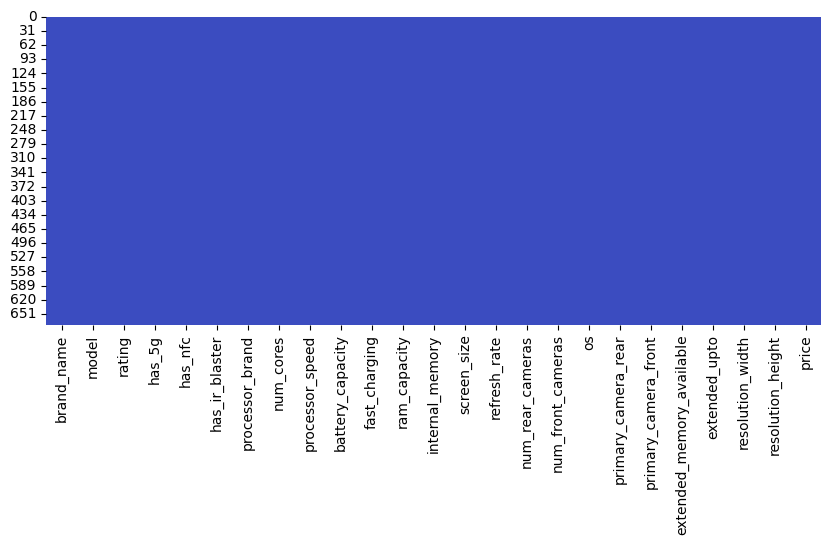

In [44]:
# Visualize missing values
plt.figure(figsize=(10, 4))
sns.heatmap(df.isnull(), cbar=False, cmap='coolwarm') # Output: no missing values

____
<a id="num_univariate"></a>
# <b><span style='color:orangered'>Step 6.1 |</span><span style='color:maroon'> Univariate Analysis</span></b>  

### <a id="num_univariate_4"></a>
#### <b><span style='color:darkorange'>Step 6.1.1 |</span><span style='color:teal'> Univariate Analysis for Categorical Features</span></b>

In [45]:
# Filter out categorical features
df_categorical = df[['brand_name','model','num_cores', 'extended_memory_available', 'has_5g', 'has_nfc', 'has_ir_blaster', 'os']].astype(str)

# Calculate 'Number of unique values' and 'Unique values' for each feature
unique_counts = df_categorical.nunique()
unique_values = df_categorical.apply(lambda col: col.unique().tolist())

# Create new dataframe with the results
pd.DataFrame({'Number of Unique Values': unique_counts, 'Unique Values': unique_values})

Number of Unique Values  \
brand_name                                      34   
model                                          494   
num_cores                                        3   
extended_memory_available                        2   
has_5g                                           2   
has_nfc                                          2   
has_ir_blaster                                   2   
os                                               3   

                                                               Unique Values  
brand_name                 [oneplus, samsung, realme, xiaomi, nothing, op...  
model                      [11, Nord CE 2 Lite, Galaxy A14, 10 Pro Plus, ...  
num_cores                                                          [8, 4, 6]  
extended_memory_available                                             [0, 1]  
has_5g                                                         [True, False]  
has_nfc                                                        [True, False]  
has_ir_blaster                                                 [False, True]  
os                                                     [android, ios, other]

In [46]:
# Create the subplots
fig = make_subplots(rows=3, cols=3, specs=[[{'type':'domain'}]*3]*3, vertical_spacing=0.05, horizontal_spacing=0.01)

# Loop through all the features and add the pie chart to the subplot
for i, feature in enumerate(df_categorical.columns):
    value_counts = df_categorical[feature].value_counts()
    labels = value_counts.index.tolist()
    values = value_counts.values.tolist()

    # Define color map based on orangered color
    cmap = colors.LinearSegmentedColormap.from_list("orangered", ["orangered", "white"])
    norm = colors.Normalize(vmin=0, vmax=len(labels))
    color_list = [colors.rgb2hex(cmap(norm(i))) for i in range(len(labels))]

    # Create the pie chart
    pie_chart = go.Pie(
        labels=labels,
        values=values,
        hole=0.6,
        marker=dict(colors=color_list, line=dict(color='white', width=3)),
        textposition='inside',
        textinfo='percent+label',
        title=feature,  # Add title with the feature name
        title_font=dict(size=25, color='black', family='Calibri')
    )

    # Add the pie chart to the subplot
    if i < 8:
        row = i // 3 + 1
        col = i % 3 + 1
        fig.add_trace(pie_chart, row=row, col=col)

# Update the layout
fig.update_layout(showlegend=False, height=1000, width=980, 
                   title={
                          'text':"Distribution of Categorical Variables",
                          'y':0.95,
                          'x':0.5,
                          'xanchor':'center',
                          'yanchor':'top',
                          'font': {'size':28, 'color':'black', 'family':'Calibri'}
                         })

# Show the plot
fig.show()

### <a id="num_univariate_4"></a>
#### <b><span style='color:darkorange'>Step 6.1.2 |</span><span style='color:teal'> Univariate Analysis for Numerical Features</span></b>

In [47]:
# Filter out numerical features
df_numerical = df.drop(df_categorical.columns, axis=1)

# Generate descriptive statistics and Transpose
df_numerical.describe().T.round(1)

count     mean      std     min      25%      50%  \
rating                675.0     79.9      5.7    67.0     76.0     81.0   
processor_speed       675.0      2.4      0.4     1.6      2.2      2.4   
battery_capacity      675.0   4946.7   1027.1  1821.0   4600.0   5000.0   
fast_charging         675.0     45.0     34.4    10.0     18.0     33.0   
ram_capacity          675.0      6.8      2.3     2.0      6.0      6.0   
internal_memory       675.0    133.3     61.6    32.0    128.0    128.0   
screen_size           675.0      6.6      0.2     4.7      6.5      6.6   
refresh_rate          675.0     97.2     26.6    60.0     60.0     90.0   
num_rear_cameras      675.0      3.0      0.7     1.0      3.0      3.0   
num_front_cameras     675.0      1.0      0.2     1.0      1.0      1.0   
primary_camera_rear   675.0     58.2     31.0     8.0     50.0     50.0   
primary_camera_front  675.0     18.1     11.0     5.0      8.0     16.0   
extended_upto         675.0    767.7    256.7   128.0    736.0    736.0   
resolution_width      675.0   1077.6    252.1   720.0   1080.0   1080.0   
resolution_height     675.0   2276.2    410.8   720.0   2400.0   2400.0   
price                 675.0  23890.5  12946.4  5785.0  14499.0  19990.0   

                          75%      max  
rating                   84.0     89.0  
processor_speed           2.7      3.2  
battery_capacity       5000.0  22000.0  
fast_charging            66.0    240.0  
ram_capacity              8.0     16.0  
internal_memory         128.0    512.0  
screen_size               6.7      7.0  
refresh_rate            120.0    165.0  
num_rear_cameras          3.0      4.0  
num_front_cameras         1.0      2.0  
primary_camera_rear      64.0    200.0  
primary_camera_front     20.0     60.0  
extended_upto          1024.0   2048.0  
resolution_width       1080.0   2460.0  
resolution_height      2408.0   3216.0  
price                 29990.0  64800.0

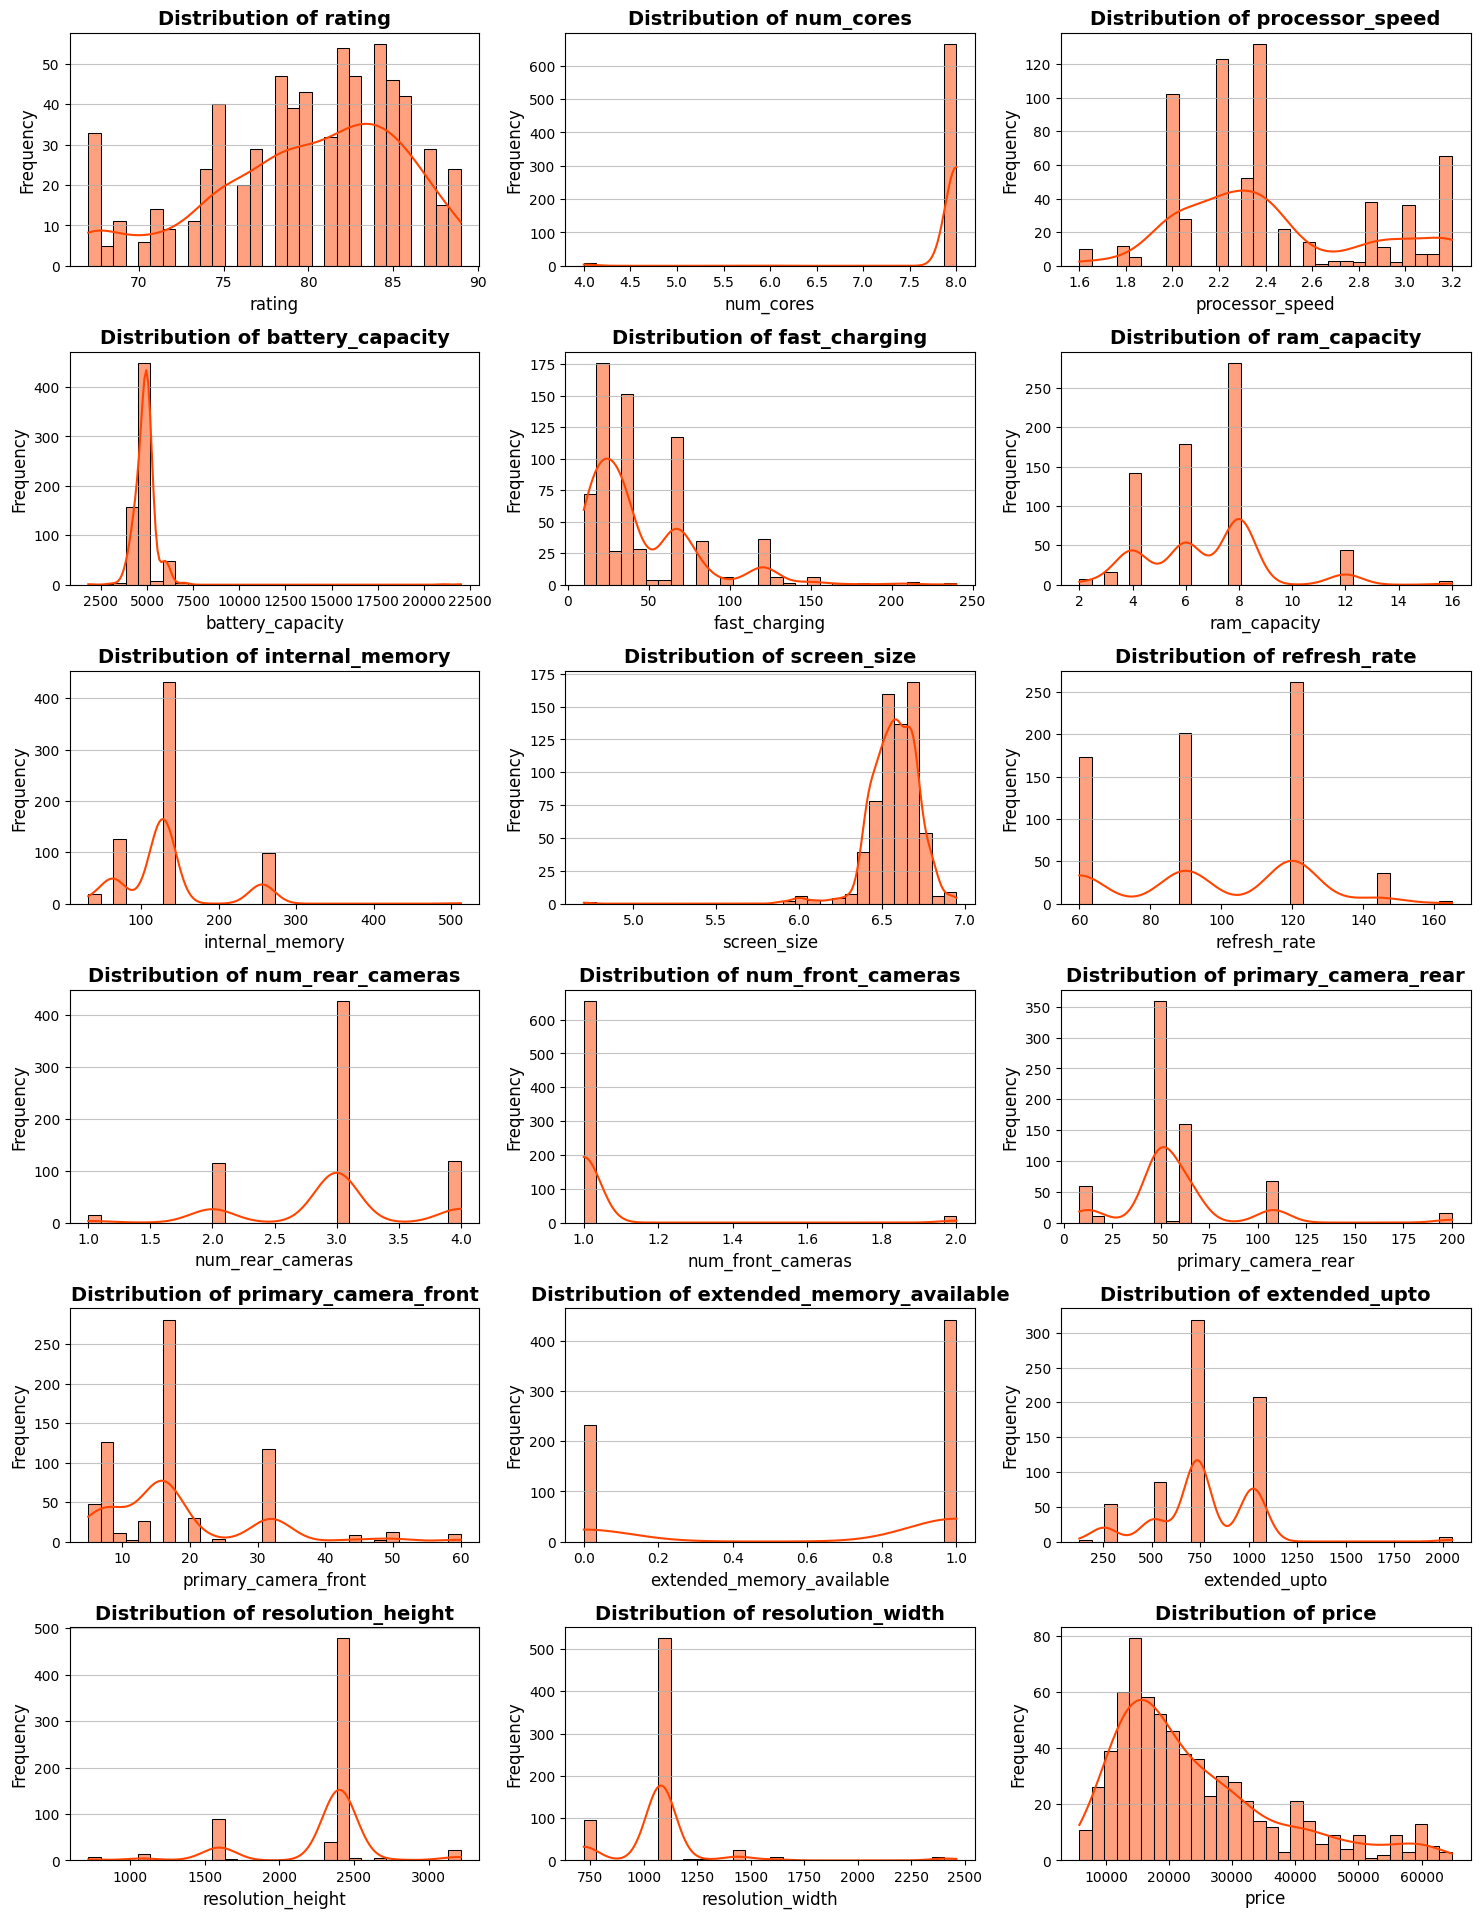

In [48]:
# All numeric columns (example list)
cols = ['rating', 'num_cores', 'processor_speed', 'battery_capacity', 'fast_charging', 'ram_capacity',
        'internal_memory', 'screen_size', 'refresh_rate', 'num_rear_cameras',
        'num_front_cameras', 'primary_camera_rear', 'primary_camera_front',
        'extended_memory_available', 'extended_upto', 'resolution_height',
        'resolution_width', 'price']

# Create subplots
fig, ax = plt.subplots(nrows=7, ncols=3, figsize=(15, 22))
ax = ax.flatten()

# Loop through columns and axes together
for i, col in enumerate(cols):
    sns.histplot(df[col], kde=True, color='orangered', bins=30, ax=ax[i])
    ax[i].set_title(f'Distribution of {col}', fontsize=14, fontweight='bold')
    ax[i].set_xlabel(col, fontsize=12)
    ax[i].set_ylabel('Frequency', fontsize=12)
    ax[i].grid(axis='y', alpha=0.75)

# Remove empty subplots (if any)
for j in range(i+1, len(ax)):
    fig.delaxes(ax[j])

plt.tight_layout()
plt.show()

In [49]:
df.columns

Index(['brand_name', 'model', 'rating', 'has_5g', 'has_nfc', 'has_ir_blaster',
       'processor_brand', 'num_cores', 'processor_speed', 'battery_capacity',
       'fast_charging', 'ram_capacity', 'internal_memory', 'screen_size',
       'refresh_rate', 'num_rear_cameras', 'num_front_cameras', 'os',
       'primary_camera_rear', 'primary_camera_front',
       'extended_memory_available', 'extended_upto', 'resolution_width',
       'resolution_height', 'price'],
      dtype='object')

____
# <b><span style='color:orangered'>Step 6.2 |</span><span style='color:maroon'> Bivariate Analysis</span></b>


### <a id="num_univariate_4"></a>
#### <b><span style='color:darkorange'>Step 6.2.1 |</span><span style='color:teal'> Bivariate Analysis for Categorical Features</span></b>

C:\Users\miraj\AppData\Local\Temp\ipykernel_9436\4199882968.py:20: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


C:\Users\miraj\AppData\Local\Temp\ipykernel_9436\4199882968.py:20: UserWarning:


The palette list has fewer values (3) than needed (34) and will cycle, which may produce an uninterpretable plot.

C:\Users\miraj\AppData\Local\Temp\ipykernel_9436\4199882968.py:20: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


C:\Users\miraj\AppData\Local\Temp\ipykernel_9436\4199882968.py:20: UserWarning:

The palette list has more values (3) than needed (2), which may not be intended.

C:\Users\miraj\AppData\Local\Temp\ipykernel_9436\4199882968.py:20: FutureWarning:



Passing `palette` without assigning `hue` is deprec

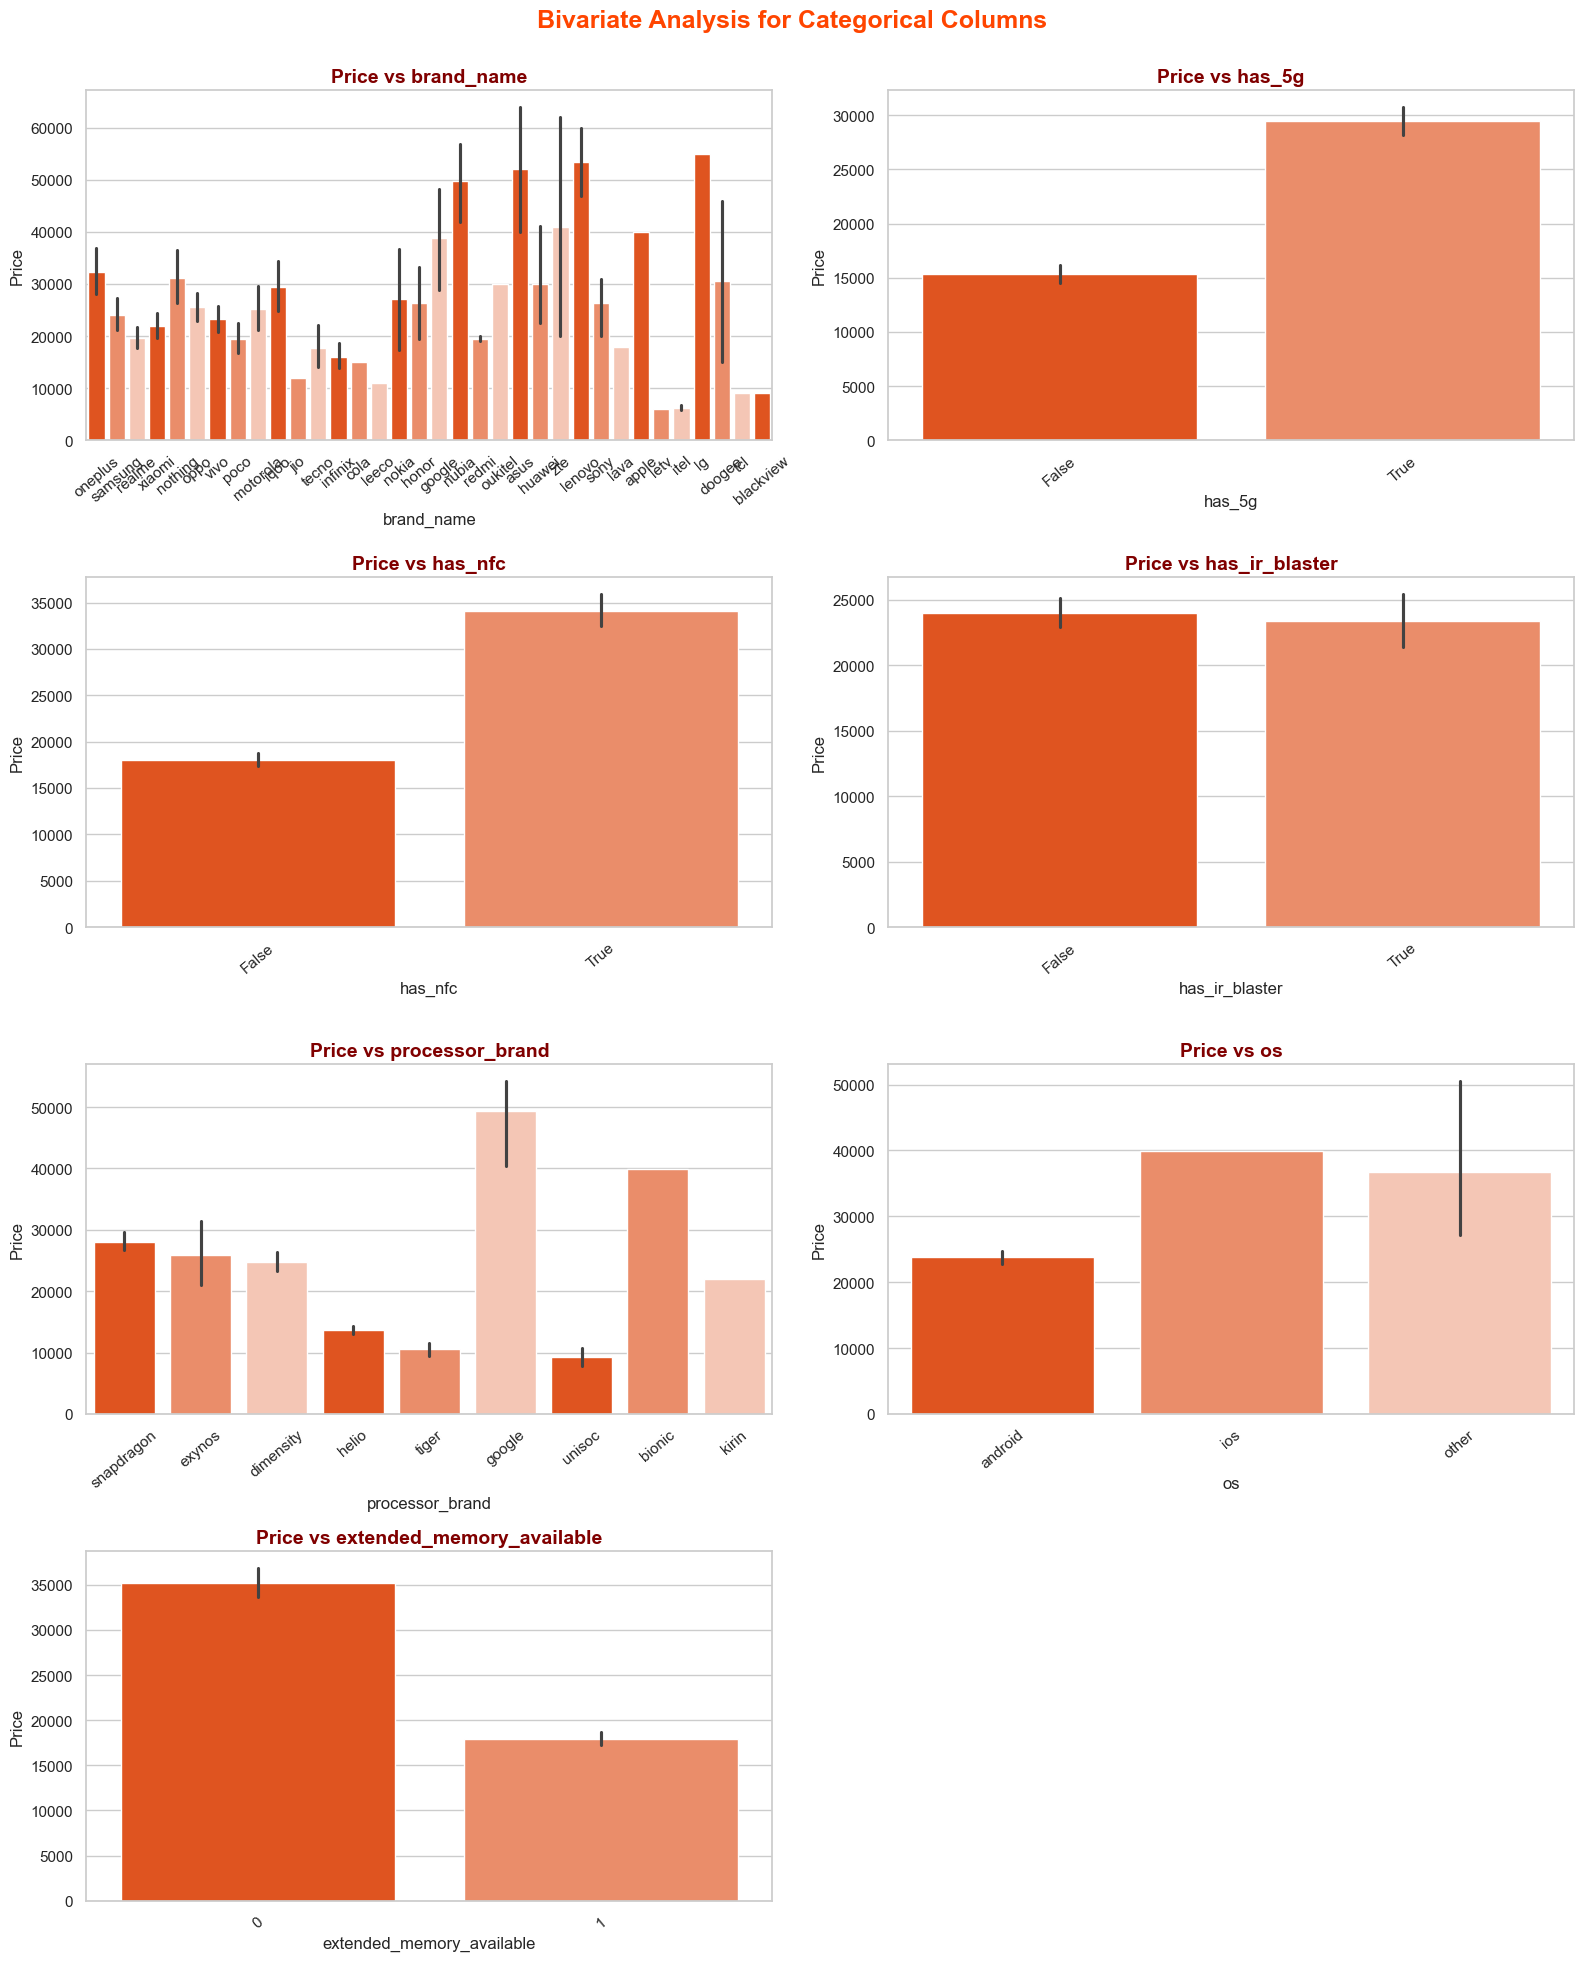

In [50]:
# Set theme for professional look
sns.set_theme(style="whitegrid", palette="coolwarm")

# Select categorical columns (excluding target column)
cat_cols = ['brand_name', 'has_5g', 'has_nfc', 'has_ir_blaster',
            'processor_brand', 'os',
            'extended_memory_available']

# Number of rows and columns for subplots (2 per row)
rows = math.ceil(len(cat_cols) / 2)
fig, axes = plt.subplots(rows, 2, figsize=(16, rows * 5))
axes = axes.flatten()

cmap = colors.LinearSegmentedColormap.from_list("orangered", ["orangered", "white"])
norm = colors.Normalize(vmin=0, vmax=len(labels))
color_list = [colors.rgb2hex(cmap(norm(i))) for i in range(len(labels))]

# Loop through categorical columns
for i, col in enumerate(cat_cols):
    sns.barplot(data=df, x=col, y='price', ax=axes[i], palette=color_list)
    axes[i].set_title(f'Price vs {col}', fontsize=14, color='maroon', fontweight='bold')
    axes[i].set_xlabel(col, fontsize=12)
    axes[i].set_ylabel('Price', fontsize=12)
    axes[i].tick_params(axis='x', rotation=40)

# Remove empty subplots (if odd number of columns)
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.suptitle('Bivariate Analysis for Categorical Columns', fontsize=18, color='orangered', fontweight='bold')
plt.tight_layout(rect=[0, 0, 1, 0.98])
plt.show()

### <a id="num_univariate_4"></a>
#### <b><span style='color:darkorange'>Step 6.2.2 |</span><span style='color:teal'> Bivariate Analysis for Numerical Features</span></b>

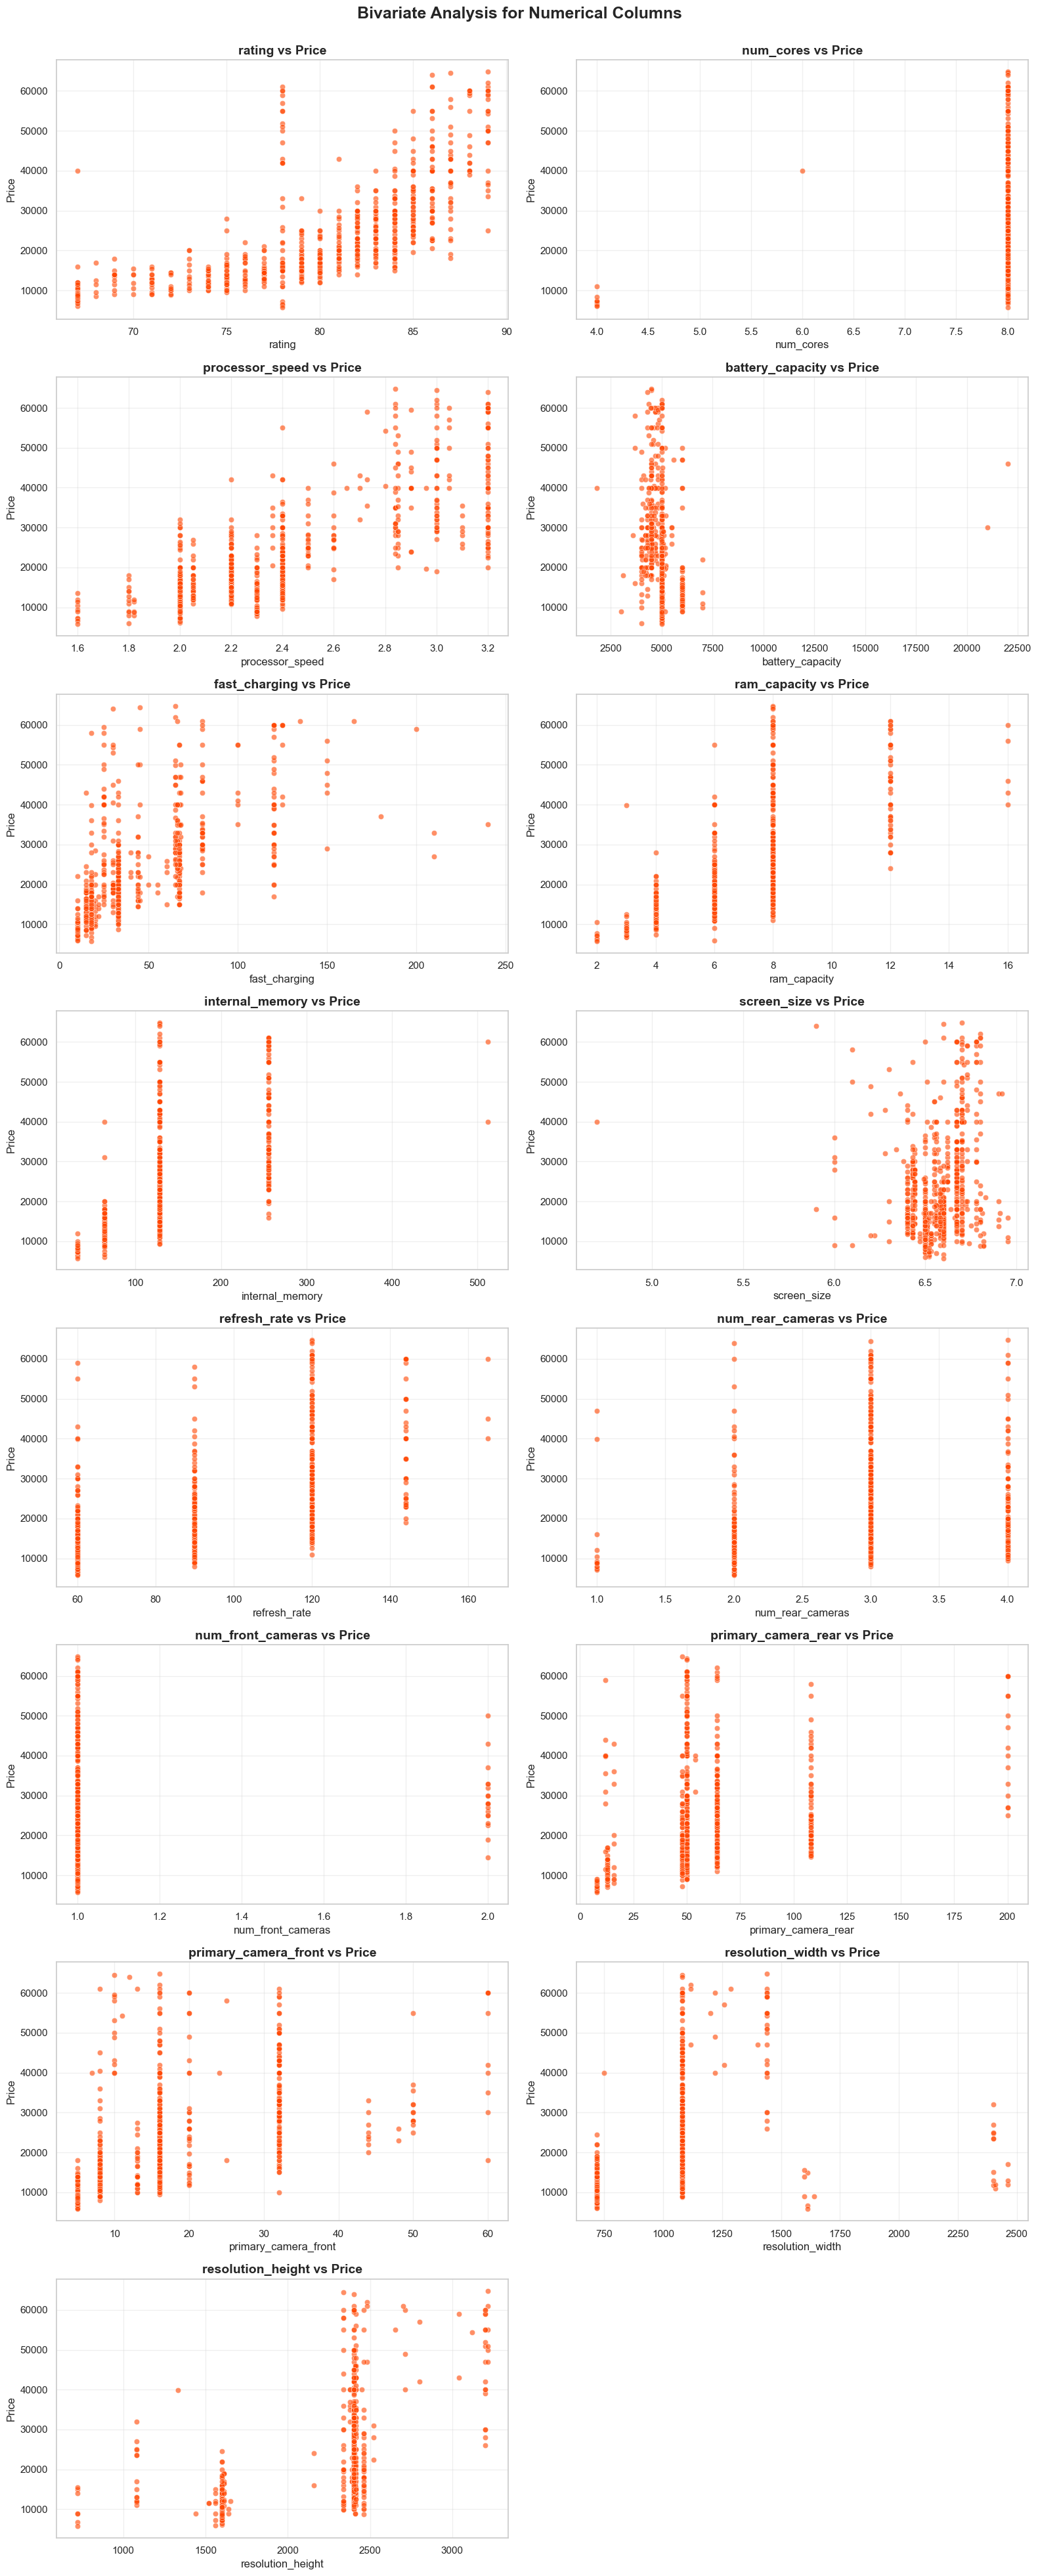

In [51]:
# Select numerical columns
num_cols = ['rating', 'num_cores', 'processor_speed', 'battery_capacity',
            'fast_charging', 'ram_capacity', 'internal_memory', 'screen_size',
            'refresh_rate', 'num_rear_cameras', 'num_front_cameras',
            'primary_camera_rear', 'primary_camera_front', 'resolution_width',
            'resolution_height']

rows = math.ceil(len(num_cols) / 2)
fig, axes = plt.subplots(rows, 2, figsize=(16, rows * 5))
axes = axes.flatten()

# Loop through numerical columns
for i, col in enumerate(num_cols):
    sns.scatterplot(data=df, x=col, y='price', ax=axes[i], alpha=0.6, c='orangered')
    axes[i].set_title(f'{col} vs Price', fontsize=14, fontweight='bold')
    axes[i].set_xlabel(col, fontsize=12)
    axes[i].set_ylabel('Price', fontsize=12)
    axes[i].grid(alpha=0.3)

# Remove empty subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.suptitle('Bivariate Analysis for Numerical Columns', fontsize=18, fontweight='bold')
plt.tight_layout(rect=[0, 0, 1, 0.98])
plt.show()


____
# <b><span style='color:orangered'>Step 6.3 |</span><span style='color:maroon'> Multivariate Analysis</span></b>


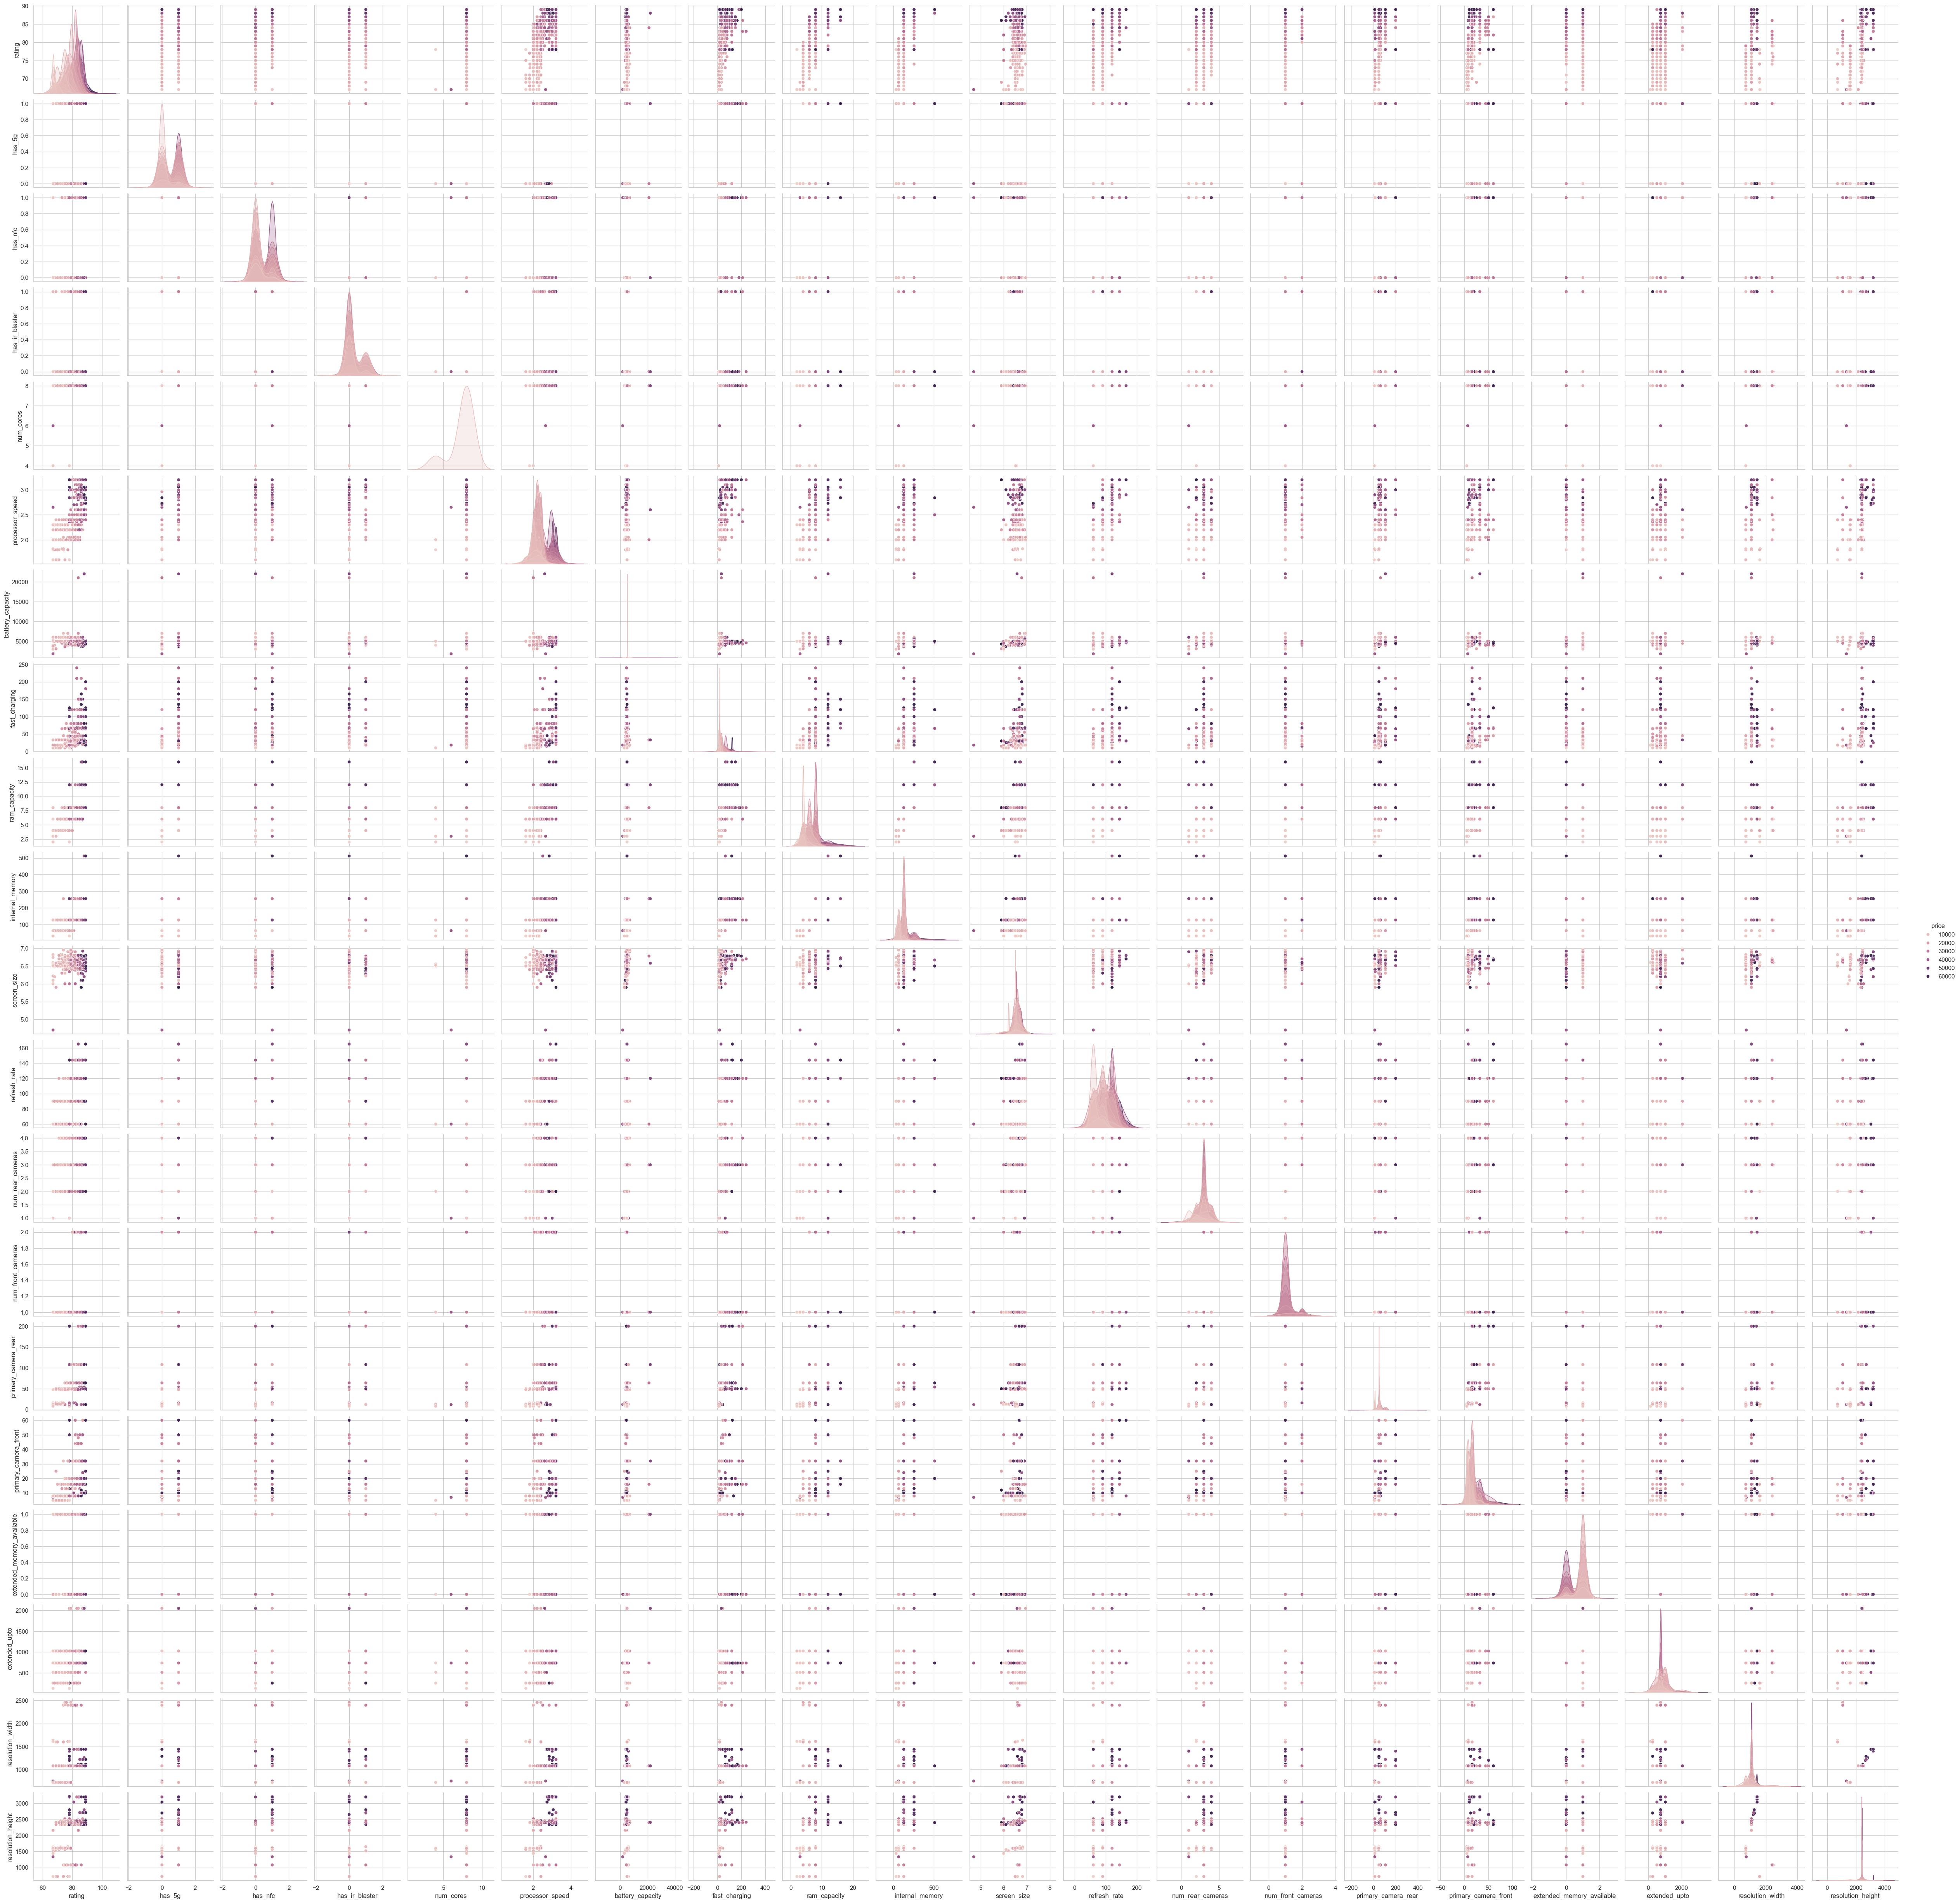

In [52]:
# multivariate analysis
sns.pairplot(df, hue= 'price')
plt.show()

____
# <b><span style='color:orangered'>Step 6.4 |</span><span style='color:maroon'> Correlation between Numerical Features</span></b>


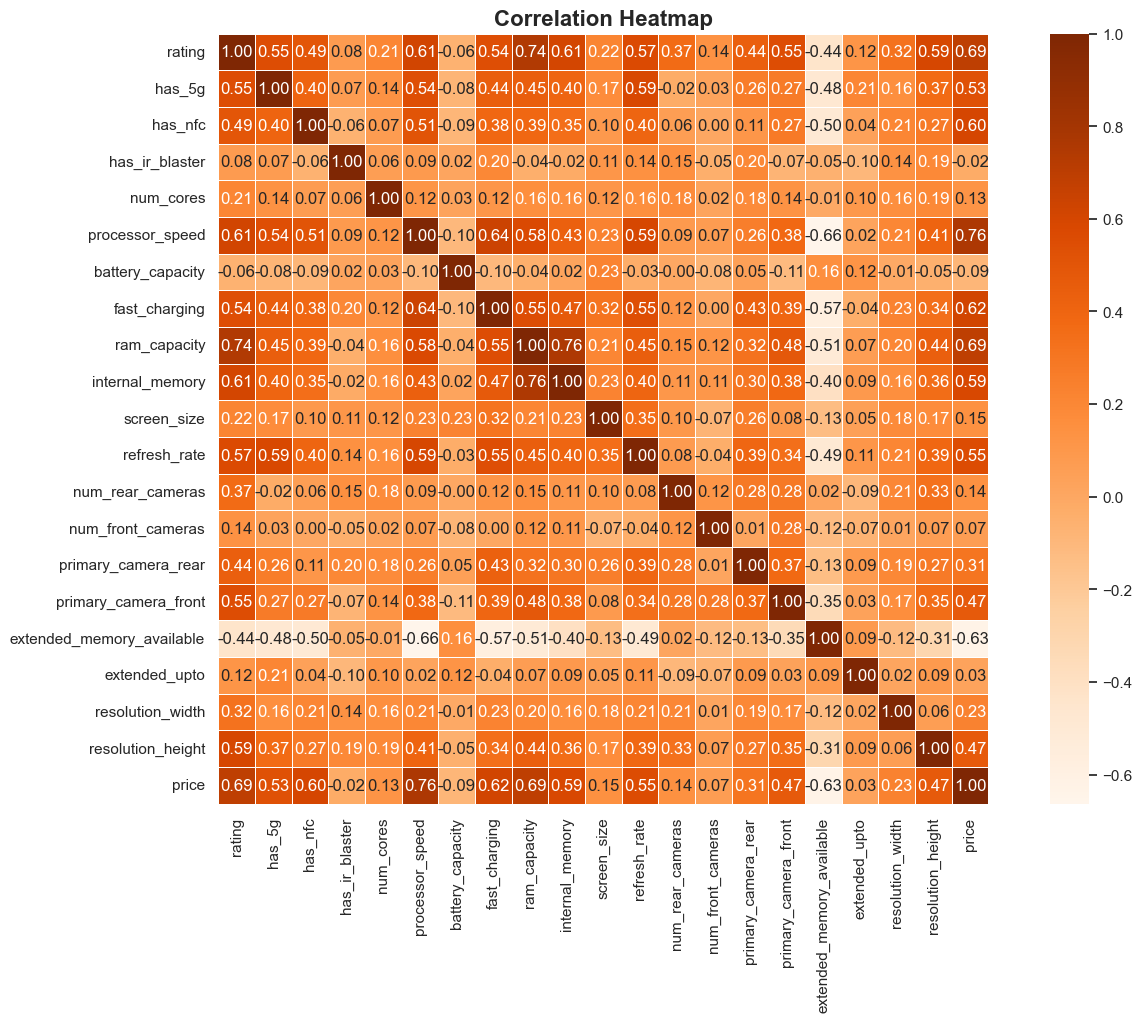

In [53]:

# correlation between numerical features
corr = df.corr(numeric_only=True)
fig = plt.figure(figsize=(16, 10))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='Oranges', cbar=True, square=True, linewidths=0.5)
plt.title('Correlation Heatmap', fontsize=16, fontweight='bold')
plt.show()

<a id="read"></a>
# <p style="background-color:maroon; font-family:calibri; font-size:80%; color:white; text-align:center; border-radius:15px 50px; padding:10px">Step 7 | Applied Machine Learning Model (Regression's)</p>

In [54]:
# Converts categorical feature values (X columns) into numeric values (0, 1, 2, …) so that ML models can understand them.
oe = OrdinalEncoder()
df[['brand_name', 'model', 'processor_brand', 'os']] = oe.fit_transform(df[['brand_name', 'model', 'processor_brand', 'os']]).astype(int)

# Display random 3 samples
df.sample(3)

brand_name  model  rating  has_5g  has_nfc  has_ir_blaster  \
583          25     22      77   False    False           False   
213          32    310      77    True    False            True   
253          24     99      82    True     True           False   

     processor_brand  num_cores  processor_speed  battery_capacity  ...  \
583                4          8             2.05              4300  ...   
213                1          8             2.20              5000  ...   
253                6          8             3.20              4500  ...   

     num_rear_cameras  num_front_cameras  os  primary_camera_rear  \
583                 4                  1   0                   64   
213                 2                  1   0                   50   
253                 3                  1   0                   64   

     primary_camera_front  extended_memory_available  extended_upto  \
583                    16                          1            256   
213                     5                          1            512   
253                    20                          0            736   

     resolution_width  resolution_height    price  
583            1080.0             2400.0  12989.0  
213            1080.0             2408.0  15990.0  
253            1080.0             2400.0  25999.0  

[3 rows x 25 columns]

In [55]:
# Converts target labels (y) or a single categorical column into numeric form.
le = LabelEncoder()
df[['has_5g', 'has_nfc', 'has_ir_blaster']] = df[['has_5g', 'has_nfc', 'has_ir_blaster']].apply(le.fit_transform)
df.sample(3)

brand_name  model  rating  has_5g  has_nfc  has_ir_blaster  \
293          27    152      75       0        0               0   
332          31    442      86       1        0               0   
613          17    214      77       0        0               0   

     processor_brand  num_cores  processor_speed  battery_capacity  ...  \
293                4          8             2.00              6000  ...   
332                1          8             3.05              4500  ...   
613                6          8             2.30              6000  ...   

     num_rear_cameras  num_front_cameras  os  primary_camera_rear  \
293                 4                  1   0                   64   
332                 3                  1   0                   50   
613                 3                  1   0                   64   

     primary_camera_front  extended_memory_available  extended_upto  \
293                    20                          1           1024   
332                    32                          0            736   
613                    16                          1            256   

     resolution_width  resolution_height    price  
293            1080.0             2400.0  12120.0  
332            1080.0             2400.0  54999.0  
613            1080.0             2460.0  14499.0  

[3 rows x 25 columns]

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 675 entries, 0 to 674
Data columns (total 25 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   brand_name                 675 non-null    int64  
 1   model                      675 non-null    int64  
 2   rating                     675 non-null    int64  
 3   has_5g                     675 non-null    int64  
 4   has_nfc                    675 non-null    int64  
 5   has_ir_blaster             675 non-null    int64  
 6   processor_brand            675 non-null    int64  
 7   num_cores                  675 non-null    int64  
 8   processor_speed            675 non-null    float64
 9   battery_capacity           675 non-null    int64  
 10  fast_charging              675 non-null    float64
 11  ram_capacity               675 non-null    int64  
 12  internal_memory            675 non-null    int64  
 13  screen_size                675 non-null    float64

In [57]:
# Define features and label/target variable
X = df.drop('price', axis=1)
y = df['price']

# Split the data into training and testing sets
X_train , X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [58]:
# Standard Scaling of features (normalizes features to have mean = 0 and std = 1 for better ML performance.)
xscaler = StandardScaler()
X_train_s = xscaler.fit_transform(X_train)
X_test_s = xscaler.transform(X_test)

____
# <b><span style='color:orangered'>Step 7.1 |</span><span style='color:maroon'> Linear Regression</span></b>

In [59]:
# Linear Regression
lr = LinearRegression()

# Train the Linear Regression model
lr.fit(X_train, y_train)

# Make predictions
y_pred = lr.predict(X_test)

# Evaluate the model
print('R2 Score', r2_score(y_test, y_pred))
print('mean_absolute_error', mean_absolute_error(y_test, y_pred))
print('mean_squared_error', mean_squared_error(y_test, y_pred))

R2 Score 0.7385497824200205
mean_absolute_error 4686.734711013259
mean_squared_error 42345383.4310729


____
# <b><span style='color:orangered'>Step 7.2 |</span><span style='color:maroon'> Support Vector Regression(SVR)</span></b>

In [60]:
# Support Vector Regressor
svr = SVR(kernel='linear', C=100, gamma=0.1, epsilon=.1)

# Train the SVR model
svr.fit(X_train, y_train)

# Make predictions
y_pred = svr.predict(X_test)

# Evaluate the model
print('R2 Score', r2_score(y_test, y_pred))
print('mean_absolute_error', mean_absolute_error(y_test, y_pred))
print('mean_squared_error', mean_squared_error(y_test, y_pred))

R2 Score 0.6706479692647004
mean_absolute_error 4503.604188424254
mean_squared_error 53342996.43878637


____
# <b><span style='color:orangered'>Step 7.3 |</span><span style='color:maroon'> Decision Tree Regression</span></b>

In [61]:
# Decision Tree Regressor
dt = DecisionTreeRegressor(random_state=42)

# Train the Decision Tree Regressor
dt.fit(X_train, y_train)

# Make predictions
y_pred = dt.predict(X_test)

# Evaluate the model
print('R2 Score', r2_score(y_test, y_pred))
print('mean_absolute_error', mean_absolute_error(y_test, y_pred))
print('mean_squared_error', mean_squared_error(y_test, y_pred))


R2 Score 0.7166396940673857
mean_absolute_error 4365.4
mean_squared_error 45894017.28148148


____
# <b><span style='color:orangered'>Step 7.4 |</span><span style='color:maroon'> K-Nearest Neighbors (KNN) Regression</span></b>

In [62]:
# K-Nearest Neighbors Regressor
knn = KNeighborsRegressor(n_neighbors=5)

# Train the KNN Regressor
knn.fit(X_train, y_train)

# Make predictions
y_pred = knn.predict(X_test)

# Evaluate the model
print('R2 Score', r2_score(y_test, y_pred))
print('mean_absolute_error', mean_absolute_error(y_test, y_pred))
print('mean_squared_error', mean_squared_error(y_test, y_pred))

R2 Score 0.6153776962655473
mean_absolute_error 5484.45037037037
mean_squared_error 62294761.42162963


____
# <b><span style='color:orangered'>Step 7.5 |</span><span style='color:maroon'> Bagging Regressor</span></b>

In [63]:
# Bagging Regressor
bag = BaggingRegressor(n_estimators=100, random_state=42)

# Train the Bagging Regressor
bag.fit(X_train, y_train)

# Make predictions
y_pred = bag.predict(X_test)

# Evaluate the model
print('R2 Score', r2_score(y_test, y_pred))
print('mean_absolute_error', mean_absolute_error(y_test, y_pred))
print('mean_squared_error', mean_squared_error(y_test, y_pred))

R2 Score 0.880015240466125
mean_absolute_error 3074.159703703703
mean_squared_error 19433147.523745183


____
# <b><span style='color:orangered'>Step 7.6 |</span><span style='color:maroon'> Voting Regressor</span></b>

In [64]:
# Voting Regressor
vr = VotingRegressor(estimators=[
    ('lr', LinearRegression()),
    ('dt', DecisionTreeRegressor(random_state=42)),
    ('svr', SVR(kernel='linear', C=100, gamma=0.1, epsilon=.1))
])

# Train the Voting Regressor
vr.fit(X_train, y_train)

# Make predictions
y_pred = vr.predict(X_test)

# Evaluate the model
print('R2 Score', r2_score(y_test, y_pred))
print('mean_absolute_error', mean_absolute_error(y_test, y_pred))
print('mean_squared_error', mean_squared_error(y_test, y_pred))

R2 Score 0.7880061449764846
mean_absolute_error 3947.1037256001364
mean_squared_error 34335259.53466045


____
# <b><span style='color:orangered'>Step 7.7 |</span><span style='color:maroon'> Random Forest Regressor</span></b>

In [65]:
# Random Forest Regressor
rf = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the Random Forest Regressor
rf.fit(X_train, y_train)

# Make predictions
y_pred = rf.predict(X_test)

# Evaluate the model
print('R2 Score', r2_score(y_test, y_pred))
print('mean_absolute_error', mean_absolute_error(y_test, y_pred))
print('mean_squared_error', mean_squared_error(y_test, y_pred))

R2 Score 0.8839690626101215
mean_absolute_error 3020.2374074074078
mean_squared_error 18792772.785274815


____
# <b><span style='color:orangered'>Step 7.8 |</span><span style='color:maroon'> LightGBM Regressor</span></b>

In [66]:
# LightGBM (Light Gradient Boosting Machine) Regressor
lgbm = lgb.LGBMRegressor(n_estimators=100, random_state=42)

# Train the LightGBM Regressor
lgbm.fit(X_train, y_train)

# Make predictions
y_pred = lgbm.predict(X_test)

# Evaluate the model
print('R2 Score', r2_score(y_test, y_pred))
print('mean_absolute_error', mean_absolute_error(y_test, y_pred))
print('mean_squared_error', mean_squared_error(y_test, y_pred))

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001256 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 424
[LightGBM] [Info] Number of data points in the train set: 540, number of used features: 21
[LightGBM] [Info] Start training from score 23890.766667
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain

### StackingRegressor Model
____
# <b><span style='color:orangered'>Step 7.9 |</span><span style='color:maroon'> Stacking Regressor</span></b>

In [67]:
# Stacking Regressor
st = StackingRegressor(estimators=[
    ('lr', LinearRegression()),
    ('dt', DecisionTreeRegressor(random_state=42)),
    ('svr', SVR(kernel='linear', C=100, gamma=0.1, epsilon=.1))
], final_estimator=RandomForestRegressor(n_estimators=100, random_state=42))

# Train the Stacking Regressor
st.fit(X_train, y_train)

# Make predictions
y_pred = st.predict(X_test)

# Evaluate the model
print('R2 Score', r2_score(y_test, y_pred))
print('mean_absolute_error', mean_absolute_error(y_test, y_pred))
print('mean_squared_error', mean_squared_error(y_test, y_pred))

R2 Score 0.8215566272276011
mean_absolute_error 3878.990740740741
mean_squared_error 28901307.14260963


### AdaBoostRegressor model
____
# <b><span style='color:orangered'>Step 7.10 |</span><span style='color:maroon'> AdaBoost Regressor</span></b>

In [68]:
# AdaBoost Regressor
ada = AdaBoostRegressor(n_estimators=100, random_state=42)

# Train the AdaBoost Regressor
ada.fit(X_train, y_train)

# Make predictions
y_pred = ada.predict(X_test)

# Evaluate the model
print('R2 Score', r2_score(y_test, y_pred))
print('mean_absolute_error', mean_absolute_error(y_test, y_pred))
print('mean_squared_error', mean_squared_error(y_test, y_pred))


R2 Score 0.7829575850286848
mean_absolute_error 5038.56496142938
mean_squared_error 35152941.80221848


### GradientBoostingRegressor model
____
# <b><span style='color:orangered'>Step 7.11 |</span><span style='color:maroon'> Gradient Boosting Regressor</span></b>

In [69]:
# Gradient Boosting Regressor
gbr = GradientBoostingRegressor(n_estimators=100, random_state=42)

# Train the Gradient Boosting Regressor
gbr.fit(X_train, y_train)

# Make predictions
y_pred = gbr.predict(X_test)

# Evaluate the model
print('R2 Score', r2_score(y_test, y_pred))
print('mean_absolute_error', mean_absolute_error(y_test, y_pred))
print('mean_squared_error', mean_squared_error(y_test, y_pred))

R2 Score 0.8744900254594625
mean_absolute_error 3126.330412039843
mean_squared_error 20328030.496732835


In [70]:
df

brand_name  model  rating  has_5g  has_nfc  has_ir_blaster  \
0            21      7      89       1        1               0   
1            21    246      81       1        0               0   
2            27    124      75       1        0               0   
3            25      2      82       1        0               0   
4            27    142      80       1        1               0   
..          ...    ...     ...     ...      ...             ...   
670          32     74      86       1        1               1   
671          25    235      67       0        0               0   
672          17    206      83       1        0               0   
673           6    441      75       1        0               0   
674          24    430      85       1        1               1   

     processor_brand  num_cores  processor_speed  battery_capacity  ...  \
0                  6          8             3.20              5000  ...   
1                  6          8             2.20              5000  ...   
2                  2          8             2.40              5000  ...   
3                  1          8             2.60              5000  ...   
4                  6          8             2.20              5000  ...   
..               ...        ...              ...               ...  ...   
670                1          8             3.10              5000  ...   
671                7          8             1.82              5000  ...   
672                6          8             3.00              5000  ...   
673                6          8             2.20              5000  ...   
674                1          8             2.85              5080  ...   

     num_rear_cameras  num_front_cameras  os  primary_camera_rear  \
0                   3                  1   0                   50   
1                   3                  1   0                   64   
2                   3                  1   0                   50   
3                   3                  1   0                  108   
4                   3                  1   0                   50   
..                ...                ...  ..                  ...   
670                 3                  2   0                   64   
671                 1                  1   0                    8   
672                 3                  1   0                   64   
673                 3                  1   0                   48   
674                 3                  1   0                   64   

     primary_camera_front  extended_memory_available  extended_upto  \
0                      16                          0            736   
1                      16                          1           1024   
2                      13                          1           1024   
3                      16                          0            736   
4                       8                          1           1024   
..                    ...                        ...            ...   
670                    32                          0            736   
671                     5                          1           1024   
672                    16                          0            736   
673                     8                          1           1024   
674                    16                          0            736   

     resolution_width  resolution_height    price  
0              1440.0             3216.0  54999.0  
1              1080.0             2412.0  19989.0  
2              1080.0             2408.0  16499.0  
3              1080.0             2412.0  24999.0  
4              1080.0             2408.0  16999.0  
..                ...                ...      ...  
670            1080.0             2400.0  32990.0  
671             720.0             1600.0   8720.0  
672            1080.0             2460.0  34990.0  
673             720.0             1600.0  14990.0  
674            1080.0             2460.0  289

### ExtraTreesRegressor model
____
# <b><span style='color:orangered'>Step 7.12 |</span><span style='color:maroon'> Extra Trees Regressor</span></b>

In [81]:
# Extra Trees Regressor
etr = ExtraTreesRegressor(n_estimators=81, max_depth=12)

# Train the Extra Trees Regressor
etr.fit(X_train, y_train)

# Make predictions
y_pred = etr.predict(X_test)

#pickle.dump(etr, open('smartphone_price_model.pkl', 'wb'))

# Evaluate the model
print('R2 Score', r2_score(y_test, y_pred))
print('mean_absolute_error', mean_absolute_error(y_test, y_pred))
print('mean_squared_error', mean_squared_error(y_test, y_pred))

R2 Score 0.8860187489030421
mean_absolute_error 2944.6448712164374
mean_squared_error 18460798.489018645


____
# <b><span style='color:orangered'>Step 7.13 |</span><span style='color:maroon'> XGBoost Regressor</span></b>

In [72]:
# XGBoost Regressor
xgbr = xgb.XGBRegressor(objective ='reg:squarederror', n_estimators=100, random_state=42)

# Train the XGBoost Regressor
xgbr.fit(X_train, y_train)

# Make predictions
y_pred = xgbr.predict(X_test)

# Evaluate the model
print('R2 Score', r2_score(y_test, y_pred))
print('mean_absolute_error', mean_absolute_error(y_test, y_pred))
print('mean_squared_error', mean_squared_error(y_test, y_pred))

R2 Score 0.888988636265088
mean_absolute_error 2968.525509982639
mean_squared_error 17979785.238171145


____
# <b><span style='color:orangered'>Step 7.14 |</span><span style='color:maroon'> CatBoost Regressor</span></b>

In [73]:
# CatBoost regression model
catbr = CatBoostRegressor(iterations=1000, learning_rate=0.1, depth=6, random_seed=42, verbose=0)

# Train the CatBoost Regressor
catbr.fit(X_train, y_train)

# Make predictions
y_pred = catbr.predict(X_test)

# Evaluate the model
print('R2 Score', r2_score(y_test, y_pred))
print('mean_absolute_error', mean_absolute_error(y_test, y_pred))
print('mean_squared_error', mean_squared_error(y_test, y_pred))

R2 Score 0.8659718709058378
mean_absolute_error 2931.8795562590053
mean_squared_error 21707660.332336377


____
# <b><span style='color:orangered'>Step 7.15 |</span><span style='color:maroon'> ElasticNet Regression</span></b>

In [74]:
# ElasticNet Regression
enet = ElasticNet(alpha=1.0, l1_ratio=0.5, random_state=42)

# Train the ElasticNet Regression model
enet.fit(X_train, y_train)

# Make predictions
y_pred = enet.predict(X_test)

# Evaluate the model
print("ElasticNet Regression")
print("R2 Score:", r2_score(y_test, y_pred))
print("mean_absolute_error:", mean_absolute_error(y_test, y_pred))
print("mean_squared_error:", mean_squared_error(y_test, y_pred))
print("--------------------------------------")


ElasticNet Regression
R2 Score: 0.6886442598023879
mean_absolute_error: 5149.479079538657
mean_squared_error: 50428254.8477902
--------------------------------------


____
# <b><span style='color:orangered'>Step 7.16 |</span><span style='color:maroon'> Lasso Regression</span></b>

In [75]:
# Lasso Regression
lasso = Lasso(alpha=1.0, random_state=42)

# Train the Lasso Regression model
lasso.fit(X_train, y_train)

# Make predictions
y_pred = lasso.predict(X_test)

# Evaluate the model
print("Lasso Regression")
print("R2 Score:", r2_score(y_test, y_pred))
print("mean_absolute_error:", mean_absolute_error(y_test, y_pred))
print("mean_squared_error:", mean_squared_error(y_test, y_pred))
print("--------------------------------------")


Lasso Regression
R2 Score: 0.7386128097673642
mean_absolute_error: 4685.817657114728
mean_squared_error: 42335175.30344303
--------------------------------------


____
# <b><span style='color:orangered'>Step 7.17 |</span><span style='color:maroon'> Ridge Regression</span></b>

In [76]:
# Ridge Regression
ridge = Ridge(alpha=1.0, random_state=42)

# Train the Ridge Regression model
ridge.fit(X_train, y_train)

# Make predictions
y_pred = ridge.predict(X_test)

# Evaluate the model
print("Ridge Regression")
print("R2 Score:", r2_score(y_test, y_pred))
print("mean_absolute_error:", mean_absolute_error(y_test, y_pred))
print("mean_squared_error:", mean_squared_error(y_test, y_pred))
print("--------------------------------------")


Ridge Regression
R2 Score: 0.740423023359732
mean_absolute_error: 4666.538516188587
mean_squared_error: 42041986.83578569
--------------------------------------


____
# <b><span style='color:orangered'>Step 7.18 |</span><span style='color:maroon'> Huber Regression</span></b>

In [77]:
# Huber Regressor
huber = HuberRegressor()

# Train the Huber Regressor model
huber.fit(X_train, y_train)

# Make predictions
y_pred = huber.predict(X_test)

# Evaluate the model
print("Huber Regressor")
print("R2 Score:", r2_score(y_test, y_pred))
print("mean_absolute_error:", mean_absolute_error(y_test, y_pred))
print("mean_squared_error:", mean_squared_error(y_test, y_pred))
print("--------------------------------------")


Huber Regressor
R2 Score: 0.4714627181689426
mean_absolute_error: 5769.239680032933
mean_squared_error: 85603730.08642314
--------------------------------------


C:\Users\miraj\AppData\Roaming\Python\Python313\site-packages\sklearn\linear_model\_huber.py:348: ConvergenceWarning:

lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html



____
# <b><span style='color:orangered'>Step 7.19 |</span><span style='color:maroon'> Kernel Ridge Regressor</span></b>

In [78]:
# Kernel Ridge Regression

# Scale data
scaler = StandardScaler()

# Fit and transform the training data, transform the test data
X_train_s = scaler.fit_transform(X_train)

# Transform the test data
X_test_s = scaler.transform(X_test)

# Create and train the Kernel Ridge Regression model
krr = KernelRidge(kernel='rbf')
krr.fit(X_train_s, y_train)

# Make predictions
y_pred = krr.predict(X_test_s)

# Evaluate the model
print("Kernel Ridge Regression")
print("R2 Score:", r2_score(y_test, y_pred))
print("mean_absolute_error:", mean_absolute_error(y_test, y_pred))
print("mean_squared_error:", mean_squared_error(y_test, y_pred))
print("--------------------------------------")


Kernel Ridge Regression
R2 Score: 0.7746492557733127
mean_absolute_error: 4183.568336327822
mean_squared_error: 36498587.60525825
--------------------------------------


____
# <b><span style='color:orangered'>Step 7.20 |</span><span style='color:maroon'> Multi-Layer Perceptron Regressor</span></b>

In [79]:
# Multi-Layer Perceptron Regressor (Neural Network)
mlp = MLPRegressor(hidden_layer_sizes=(128, 64), activation='relu',
                   solver='adam', max_iter=1000, random_state=42)

# Train the MLP Regressor model
mlp.fit(X_train_s, y_train)

# Make predictions
y_pred = mlp.predict(X_test_s)

# Evaluate the model
print("MLP Regressor (Neural Network)")
print("R2 Score:", r2_score(y_test, y_pred))
print("mean_absolute_error:", mean_absolute_error(y_test, y_pred))
print("mean_squared_error:", mean_squared_error(y_test, y_pred))
print("--------------------------------------")


MLP Regressor (Neural Network)
R2 Score: 0.770787782697525
mean_absolute_error: 4284.386762334592
mean_squared_error: 37124005.16855774
--------------------------------------


C:\Users\miraj\AppData\Roaming\Python\Python313\site-packages\sklearn\neural_network\_multilayer_perceptron.py:781: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.



<a id="read"></a>
# <p style="background-color:maroon; font-family:calibri; font-size:80%; color:white; text-align:center; border-radius:15px 50px; padding:10px">Step 8 | Model Selection and Comparison</p>

____
# <b><span style='color:orangered'>Step 8.1 |</span><span style='color:maroon'> Model Selection</span></b>

<div style="border-radius:10px; border:#8B0000 solid; padding:15px; background-color:#FAF3F3; font-size:100%; text-align:left; color:#222;">
  <h3 align="left" style="color:#8B0000;">Model Selection Using Optuna</h3>
  <p style="margin:6px 0 0; line-height:1.6;">
    Using <strong>Optuna</strong> for hyperparameter optimization, we have to compare several top models for Mobile Price Prediction given bellow:
  </p>
  <ul style="margin:6px 0 0; line-height:1.6;">
    <li>Bagging Regressor</li>
    <li>Random Forest Regressor</li>
    <li>Gradient Boosting Regressor</li>
    <li>Extra Trees Regressor</li>
    <li>XGBoost Regressor</li>
    <li>CatBoost Regressor</li>
  </ul>
  </pre>
</div>


In [80]:
# OPTUNA HYPERPARAMETER TUNING


# Objective Function
def objective(trial):

    model_name = trial.suggest_categorical(
        "model", 
        ["Bagging", "RandomForest", "GradientBoosting", "ExtraTrees", "XGBoost", "CatBoost"]
    )

    # -------------------- BAGGING --------------------
    if model_name == "Bagging":
        n_estimators = trial.suggest_int("n_estimators", 50, 300)
        max_samples = trial.suggest_float("max_samples", 0.5, 1.0)

        model = BaggingRegressor(
            n_estimators=n_estimators,
            max_samples=max_samples,
            random_state=42
        )

    # -------------------- RANDOM FOREST --------------------
    elif model_name == "RandomForest":
        n_estimators = trial.suggest_int("n_estimators", 50, 300)
        max_depth = trial.suggest_int("max_depth", 3, 30)
        min_samples_split = trial.suggest_int("min_samples_split", 2, 20)

        model = RandomForestRegressor(
            n_estimators=n_estimators,
            max_depth=max_depth,
            min_samples_split=min_samples_split,
            random_state=42
        )

    # -------------------- GRADIENT BOOSTING --------------------
    elif model_name == "GradientBoosting":
        n_estimators = trial.suggest_int("n_estimators", 50, 300)
        learning_rate = trial.suggest_float("learning_rate", 0.01, 0.3)
        max_depth = trial.suggest_int("max_depth", 2, 10)

        model = GradientBoostingRegressor(
            n_estimators=n_estimators,
            learning_rate=learning_rate,
            max_depth=max_depth,
            random_state=42
        )

    # -------------------- EXTRA TREES --------------------
    elif model_name == "ExtraTrees":
        n_estimators = trial.suggest_int("n_estimators", 50, 300)
        max_depth = trial.suggest_int("max_depth", 3, 30)

        model = ExtraTreesRegressor(
            n_estimators=n_estimators,
            max_depth=max_depth,
            random_state=42
        )

    # -------------------- XGBOOST --------------------
    elif model_name == "XGBoost":
        n_estimators = trial.suggest_int("n_estimators", 50, 300)
        learning_rate = trial.suggest_float("learning_rate", 0.01, 0.3)
        max_depth = trial.suggest_int("max_depth", 3, 15)

        model = xgb.XGBRegressor(
            objective="reg:squarederror",
            n_estimators=n_estimators,
            learning_rate=learning_rate,
            max_depth=max_depth,
            random_state=42
        )

    # -------------------- CATBOOST --------------------
    elif model_name == "CatBoost":
        iterations = trial.suggest_int("iterations", 200, 1200)
        learning_rate = trial.suggest_float("learning_rate", 0.01, 0.3)
        depth = trial.suggest_int("depth", 4, 10)

        model = CatBoostRegressor(
            iterations=iterations,
            learning_rate=learning_rate,
            depth=depth,
            random_seed=42,
            verbose=0
        )

    # -------------------- TRAIN --------------------
    model.fit(X_train, y_train)

    # -------------------- VALIDATE --------------------
    predictions = model.predict(X_test)
    loss = mean_absolute_error(y_test, predictions)   # You can change to RMSE also

    return loss


# Run Optuna Study
study = optuna.create_study(direction="minimize")
study.optimize(objective, n_trials=50)

# Final Result
print("Best Model:", study.best_trial.params["model"])
print("Best Parameters:", study.best_params)
print("Best Score (MAE):", study.best_value)


[I 2025-11-23 16:42:36,842] A new study created in memory with name: no-name-80c80121-eaa4-4b95-90aa-2ce54f14b977
[I 2025-11-23 16:42:39,998] Trial 0 finished with value: 3079.2481071477378 and parameters: {'model': 'Bagging', 'n_estimators': 271, 'max_samples': 0.557756730639595}. Best is trial 0 with value: 3079.2481071477378.
[I 2025-11-23 16:42:41,114] Trial 1 finished with value: 3090.648256384973 and parameters: {'model': 'GradientBoosting', 'n_estimators': 138, 'learning_rate': 0.06862314621235607, 'max_depth': 5}. Best is trial 0 with value: 3079.2481071477378.
[I 2025-11-23 16:42:55,284] Trial 2 finished with value: 3242.0623304269902 and parameters: {'model': 'CatBoost', 'iterations': 495, 'learning_rate': 0.10933728291311319, 'depth': 10}. Best is trial 0 with value: 3079.2481071477378.
[I 2025-11-23 16:42:57,744] Trial 3 finished with value: 3020.202371669916 and parameters: {'model': 'Bagging', 'n_estimators': 228, 'max_samples': 0.716187069325542}. Best is trial 3 with va

Best Model: ExtraTrees
Best Parameters: {'model': 'ExtraTrees', 'n_estimators': 81, 'max_depth': 12}
Best Score (MAE): 2872.231370919696


<div
  style="border-radius:10px; border:#8B0000 solid; padding:15px; background-color:#FAF3F3; font-size:100%; text-align:left; color:#222;">
  <h3 align="left" style="color:#8B0000;">Optuna Hyperparameter Tuning</h3>
  <p style="margin:6px 0 0; line-height:1.6;">
    After running <strong>Optuna</strong> for hyperparameter optimization, the experiment identified the 
    <strong>Extra Trees Regressor</strong> as the most accurate model for the Mobile Price Prediction project.
  </p>
  
  <hr style="border:1px solid #8B0000; margin:10px 0;">

  <h4 style="color:#8B0000;">Best Performing Model</h4>
  <p style="margin:4px 0 0; line-height:1.6;">
    <strong>ExtraTrees Regressor</strong>
  </p>
  
  <hr style="border:1px solid #8B0000; margin:10px 0;">

  <h4 style="color:#8B0000;">Best Parameters Selected by Optuna</h4>
  <pre style="background-color:#fff; padding:10px; border-radius:5px; border:1px solid #8B0000;">
best_params = {
    "model": "ExtraTrees",
    "n_estimators": 81,
    "max_depth": 12
}
  </pre>
 <h4 style="color:#8B0000;">Now we have to add this best_params to <strong>Step: 7.12 Extra Trees Regressor</strong> </h4>
</div>

____
# <b><span style='color:orangered'>Step 8.2 |</span><span style='color:maroon'> Model's Comparison</span></b>

<div style="border-radius:10px; border:#8B0000 solid 2px; padding:15px; background-color:#FAF3F3; color:#222; overflow-x:auto;">
  <h3 align="center" style="color:#8B0000;">Model's Comparison</h3>
  <table style="border-collapse:collapse; width:100%; min-width:700px; font-size:15px; text-align:left;">
    <thead style="background-color:#F5D7D7;">
      <tr>
        <th style="padding:10px; border-bottom:2px solid #8B0000;">#</th>
        <th style="padding:10px; border-bottom:2px solid #8B0000;">Model Name</th>
        <th style="padding:10px; border-bottom:2px solid #8B0000;">R² Score</th>
        <th style="padding:10px; border-bottom:2px solid #8B0000;">Mean Absolute Error (MAE)</th>
        <th style="padding:10px; border-bottom:2px solid #8B0000;">Mean Squared Error (MSE)</th>
      </tr>
    </thead>
    <tbody>
      <tr style="font-weight:bold; color:#8B0000;">
        <td style="padding:10px;">1</td>
        <td style="padding:10px;">Extra Trees Regressor</td>
        <td style="padding:10px;">0.8860</td>
        <td style="padding:10px;">2944</td>
        <td style="padding:10px;">18460798</td>
      </tr>
      <tr>
        <td style="padding:10px;">2</td>
        <td style="padding:10px;">Bagging Regressor</td>
        <td style="padding:10px;">0.8816</td>
        <td style="padding:10px;">3033</td>
        <td style="padding:10px;">19176969</td>
      </tr>
      <tr>
        <td style="padding:10px;">3</td>
        <td style="padding:10px;">Random Forest Regressor</td>
        <td style="padding:10px;">0.8808</td>
        <td style="padding:10px;">3040</td>
        <td style="padding:10px;">19307148</td>
      </tr>
      <tr>
        <td style="padding:10px;">4</td>
        <td style="padding:10px;">Gradient Boosting Regressor</td>
        <td style="padding:10px;">0.8756</td>
        <td style="padding:10px;">3120</td>
        <td style="padding:10px;">20151321</td>
      </tr>
      <tr>
        <td style="padding:10px;">5</td>
        <td style="padding:10px;">XGBoost Regressor</td>
        <td style="padding:10px;">0.8890</td>
        <td style="padding:10px;">2969</td>
        <td style="padding:10px;">17979785</td>
      </tr>
      <tr>
        <td style="padding:10px;">6</td>
        <td style="padding:10px;">CatBoost Regressor</td>
        <td style="padding:10px;">0.8708</td>
        <td style="padding:10px;">2920</td>
        <td style="padding:10px;">20931812</td>
      </tr>
    </tbody>
  </table>
</div>


<a id="read"></a>
# <p style="background-color:maroon; font-family:calibri; font-size:80%; color:white; text-align:center; border-radius:15px 50px; padding:10px">Step 9 | Conclusion</p>

<div style="border-radius:10px; border:2px solid #8B0000; padding:15px; background-color:#FAF3F3; color:#222;">
    <h2 style="color:#8B0000; margin:0 0 10px;">Conclusion</h2>
    <p>Extra Trees Regressor (<strong>n_estimators=81</strong>, <strong>max_depth=12</strong>) is the preferred model for this mobile price prediction task based on Optuna tuning and test evaluation.</p>
    <ul>
        <li><strong>Dataset size:</strong> 675 samples</li>
        <li><strong>R² Score:</strong> 0.8860 (~88.60%)</li>
        <li><strong>Mean Absolute Error (MAE):</strong> 2,944</li>
        <li><strong>Mean Squared Error (MSE):</strong> 18,460,798</li>
    </ul>
    <p><strong>Why this model?</strong> High predictive accuracy, robustness from randomized trees (reduces overfitting), efficient training on tabular data, and strong ability to model non‑linear relationships.</p>
    <p><strong>Recommended next steps:</strong> run cross‑validation for more robust estimates, inspect feature importances and SHAP values, experiment with ensembling/stacking, and prepare the model for production monitoring and periodic retraining.</p>
</div>

<a id="read"></a>
# <p style="background-color:maroon; font-family:calibri; font-size:80%; color:white; text-align:center; border-radius:15px 50px; padding:10px">Step 10 | Model Deployment</p>

<div
    style="border-radius:10px; border:#8B0000 solid; padding:10px; background-color:#FAF3F3; font-size:100%; text-align:left; color:#222;">
    Visit deployed app: <a href="https://mobile-price-prediction-ml.streamlit.app/" target="_blank">Click here to open the Mobile Price Prediction App</a>
</div>


# <h1 style="text-align:center; text-shadow: 4px 4px 10px #FF0000, 8px 8px 20px #000000;">Thank You!</h1>
